# Face detection and association-based tracking using Viola-Jones Haarcascades

## Face detection

In [1]:
import os
import cv2
import time
import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_faces(face_detector, frames_path, save=False, detections_path=None, return_detections=False, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30)):
    process_times  = []
    detections     = [] if return_detections is True else None

    if save is True and detections_path is not None:
        if not os.path.exists(detections_path):
            os.makedirs(detections_path)

    num_frames = len(os.listdir(frames_path))
    progress_bar = tqdm.tqdm(total=num_frames)
    progress_bar.set_description("Detecting faces")

    for i in range(1, num_frames + 1):
        frame_name = f"{frames_path}/frames_{i:03d}.jpg"

        img = cv2.imread(frame_name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        start_time = time.time()
        faces = face_detector.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)
        end_time = time.time()

        if i != 1:
            process_times.append(end_time - start_time)

        if return_detections is True:
            detections.append(faces)

        if save is True and detections_path is not None:
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

            cv2.imwrite(f"{detections_path}/frames_{i:03d}.jpg", img)

        progress_bar.update(1)

        avg_processing_time = np.mean(process_times) if len(process_times) > 0 else 0
        progress_bar.set_postfix({f"Avg Processing time": f"{avg_processing_time:.4f}s"})

    if return_detections is True:
        return detections, process_times

    return process_times

In [3]:
face_detector = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
directory     = "./data/q1/frames"
process_times = detect_faces(face_detector, directory)

Detecting faces:   0%|          | 0/720 [00:00<?, ?it/s]

Detecting faces: 100%|██████████| 720/720 [00:37<00:00, 19.06it/s, Avg Processing time=0.0411s]


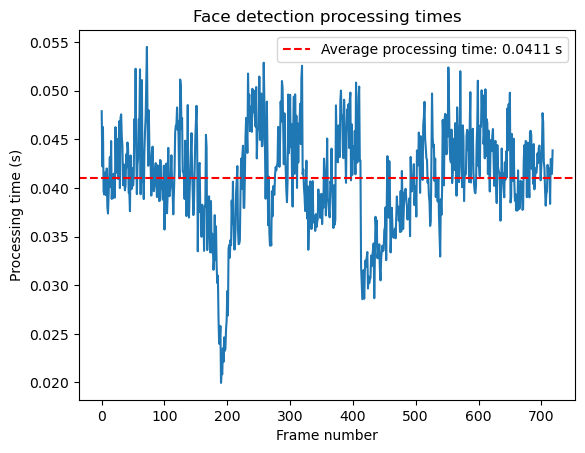

In [4]:
plt.plot(process_times)
plt.axhline(y=np.mean(process_times), color='r', linestyle='--', label=f"Average processing time: {np.mean(process_times):.4f} s")
plt.xlabel("Frame number")
plt.ylabel("Processing time (s)")
plt.title("Face detection processing times")
plt.legend()
plt.show()

<hr>

### Factors influencing processing times

In [5]:
scaleFactorsList  = [1.05, 1.1, 1.2, 1.3, 1.4]
minNeighboursList = [3, 5]
minSizesList      = [(15, 15), (30, 30)]

params             = []
avgProcessingTimes = []

frames_path = "./data/q1/frames"

for scaleFactor in scaleFactorsList:
    for minNeighbors in minNeighboursList:
        for minSize in minSizesList:
            print(f"Processing parameters: scaleFactor={scaleFactor}, minNeighbors={minNeighbors}, minSize={minSize}")

            save = True if minNeighbors == 3 and minSize == (30, 30) else False
            detections_path = f"./data/q1/detections/scaleFactor_{scaleFactor}" if save is True else None

            process_times = detect_faces(face_detector, frames_path=frames_path, save=save, detections_path=detections_path, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=minSize)

            print()

            params.append((scaleFactor, minNeighbors, minSize))
            avgProcessingTimes.append(np.mean(process_times))

Processing parameters: scaleFactor=1.05, minNeighbors=3, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [01:06<00:00, 10.79it/s, Avg Processing time=0.0841s]



Processing parameters: scaleFactor=1.05, minNeighbors=3, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [01:10<00:00, 10.20it/s, Avg Processing time=0.0785s]



Processing parameters: scaleFactor=1.05, minNeighbors=5, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [01:08<00:00, 10.53it/s, Avg Processing time=0.0875s]



Processing parameters: scaleFactor=1.05, minNeighbors=5, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [01:02<00:00, 11.60it/s, Avg Processing time=0.0788s]



Processing parameters: scaleFactor=1.1, minNeighbors=3, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:38<00:00, 18.63it/s, Avg Processing time=0.0469s]



Processing parameters: scaleFactor=1.1, minNeighbors=3, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:44<00:00, 16.24it/s, Avg Processing time=0.0443s]



Processing parameters: scaleFactor=1.1, minNeighbors=5, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:38<00:00, 18.64it/s, Avg Processing time=0.0470s]



Processing parameters: scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:35<00:00, 20.32it/s, Avg Processing time=0.0425s]



Processing parameters: scaleFactor=1.2, minNeighbors=3, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:25<00:00, 28.79it/s, Avg Processing time=0.0282s]



Processing parameters: scaleFactor=1.2, minNeighbors=3, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:33<00:00, 21.63it/s, Avg Processing time=0.0279s]



Processing parameters: scaleFactor=1.2, minNeighbors=5, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:25<00:00, 28.77it/s, Avg Processing time=0.0281s]



Processing parameters: scaleFactor=1.2, minNeighbors=5, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:23<00:00, 30.56it/s, Avg Processing time=0.0258s]



Processing parameters: scaleFactor=1.3, minNeighbors=3, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:19<00:00, 36.30it/s, Avg Processing time=0.0210s]



Processing parameters: scaleFactor=1.3, minNeighbors=3, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:27<00:00, 26.47it/s, Avg Processing time=0.0210s]



Processing parameters: scaleFactor=1.3, minNeighbors=5, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:19<00:00, 36.35it/s, Avg Processing time=0.0210s]



Processing parameters: scaleFactor=1.3, minNeighbors=5, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:18<00:00, 38.17it/s, Avg Processing time=0.0196s]



Processing parameters: scaleFactor=1.4, minNeighbors=3, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:17<00:00, 42.22it/s, Avg Processing time=0.0164s]



Processing parameters: scaleFactor=1.4, minNeighbors=3, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:22<00:00, 31.55it/s, Avg Processing time=0.0155s]



Processing parameters: scaleFactor=1.4, minNeighbors=5, minSize=(15, 15)


Detecting faces: 100%|██████████| 720/720 [00:15<00:00, 45.96it/s, Avg Processing time=0.0155s]



Processing parameters: scaleFactor=1.4, minNeighbors=5, minSize=(30, 30)


Detecting faces: 100%|██████████| 720/720 [00:15<00:00, 47.18it/s, Avg Processing time=0.0140s]

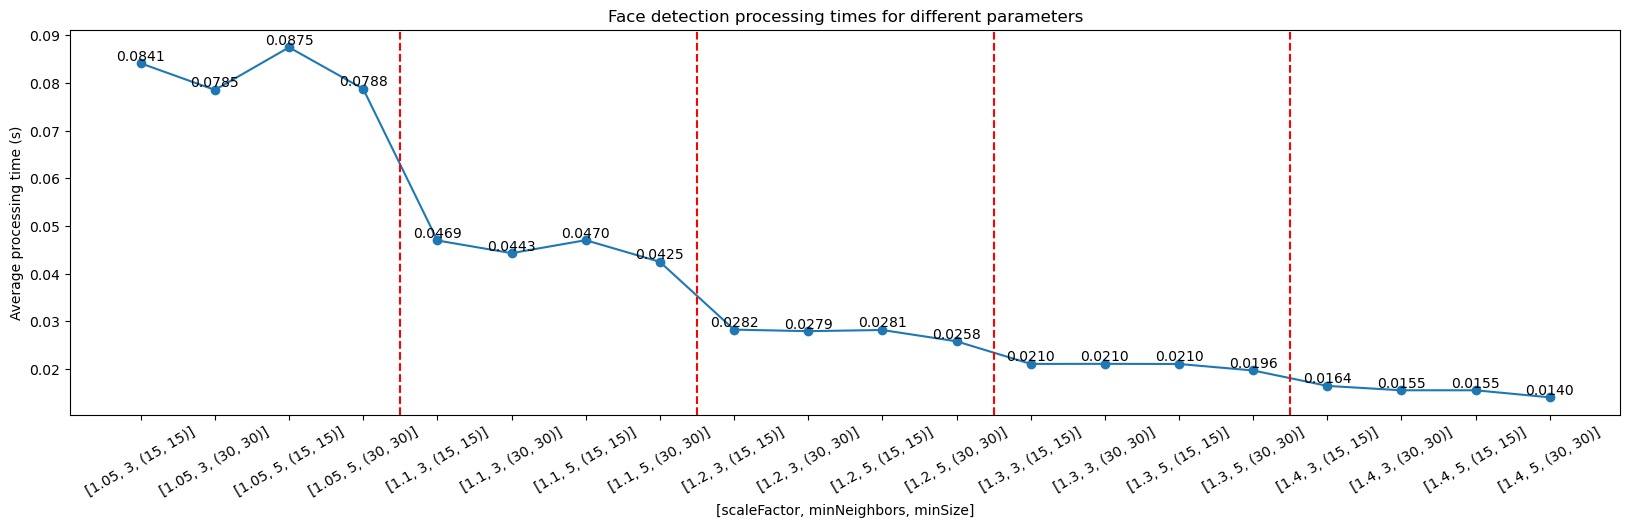

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(avgProcessingTimes, 'o-')
plt.xticks(range(len(params)), [f"[{param[0]}, {param[1]}, {param[2]}]" for param in params], rotation=30)
plt.xlabel("[scaleFactor, minNeighbors, minSize]")
plt.ylabel("Average processing time (s)")
plt.title("Face detection processing times for different parameters")

for i, avgProcessingTime in enumerate(avgProcessingTimes):
    plt.text(i, avgProcessingTime, f"{avgProcessingTime:.4f}", ha='center', va='bottom')

plt.axvline(x=3.5,  color='r', linestyle='--')
plt.axvline(x=7.5,  color='r', linestyle='--')
plt.axvline(x=11.5, color='r', linestyle='--')
plt.axvline(x=15.5, color='r', linestyle='--')

plt.show()

#### As we can see from the above plots, the most influential parameter that changes the processing time is the `scaleFactor` argument
  - This controls the size of the resizing step in the sliding window approach
  - A smaller `scaleFactor` will lead to more windows being generated and hence more computations, which naturally increases the processing time
  - Similarly, a larger `scaleFactor` will lead to fewer windows and hence shorter processing times
  - This is evident from the above plot as well, where increasing the `scaleFactor` leads to biggest drops in the processing times

#### The `minSize` parameter also has somewhat of an impact on the processing time
  - This argument describes the minimum size of an object that the detector will detect
  - Objects smaller than this size are ignored and hence will not be processed by the detector
  - Naturally, the processing time reduces for higher values of `minSize` as can be observed in the above plot as well

#### The `minNeighbours` parameter has a negligible impact on the processing time
  - This parameter is used to control the number of neighbours each candidate rectangle should have to retain it
  - This is used to control the number of false positives that are detected
  - A higher value ensures lesser false positives but risks missing out on true positives which are not so clear

#### Hence, the most important factor that influences the speed of the algorithm is the `scaleFactor` parameter, followed by the `minSize` parameter

#### But a tradeoff is inevitable when having higher `scaleFactor` values as the resizing step is larger for higher values and the detector might not be able to detect all faces when they are not scaled to the right size. Similarly, for lower `scaleFactor` values, we risk detecting a lot of false positives

#### This can be observed for the videos generated at `scaleFactor` values of `1.05, 1.1, 1.2, 1.3, 1.4` with `minNeighbours = 3` and `minSize = (30, 30)`. The links to the videos are as follows:
- [scaleFactor=1.05](https://drive.google.com/file/d/1oSlag--bDetDXAgsnHAFwKoRwylwJRAs/view?usp=sharing)
- [scaleFactor=1.1](https://drive.google.com/file/d/1_LosOln07WpEYs7oupIgEmWRKZf6Mcjh/view?usp=sharing)
- [scaleFactor=1.2](https://drive.google.com/file/d/1cubEn2hRRpPo_iXLpsP1Egv8hjF213MS/view?usp=sharing)
- [scaleFactor=1.3](https://drive.google.com/file/d/1U-P_plRlqI2Po-_JQIMEa_taLc-xxNjd/view?usp=sharing)
- [scaleFactor=1.4](https://drive.google.com/file/d/15cozclDfeI5kHM2M5zSSUDPMQwBu_Kph/view?usp=sharing)

<hr>

### Processing times of various haarcascade classifiers

In [4]:
classifier_xmls = os.listdir("./haarcascades/")
    
classfier_names = [classifier_xml[12:-4] for classifier_xml in classifier_xmls]
classifier_processing_times = []

directory = "./data/q1/frames"

for classifier_xml in classifier_xmls:
    print(f"Processing classifier: {classifier_xml}")

    face_detector = cv2.CascadeClassifier(f"./haarcascades/{classifier_xml}")
    process_times = detect_faces(face_detector, directory)
    classifier_processing_times.append(np.mean(process_times))

    print()

Processing classifier: haarcascade_frontalface_alt.xml


Detecting faces:   0%|          | 0/720 [00:00<?, ?it/s]

Detecting faces: 100%|██████████| 720/720 [00:37<00:00, 19.42it/s, Avg Processing time=0.0404s]



Processing classifier: haarcascade_frontalface_alt2.xml


Detecting faces: 100%|██████████| 720/720 [00:33<00:00, 21.27it/s, Avg Processing time=0.0404s]



Processing classifier: haarcascade_frontalface_default.xml


Detecting faces: 100%|██████████| 720/720 [00:35<00:00, 20.48it/s, Avg Processing time=0.0423s]



Processing classifier: haarcascade_frontalface_alt_tree.xml


Detecting faces: 100%|██████████| 720/720 [00:27<00:00, 26.10it/s, Avg Processing time=0.0311s]



Processing classifier: haarcascade_profileface.xml


Detecting faces: 100%|██████████| 720/720 [00:41<00:00, 17.29it/s, Avg Processing time=0.0506s]

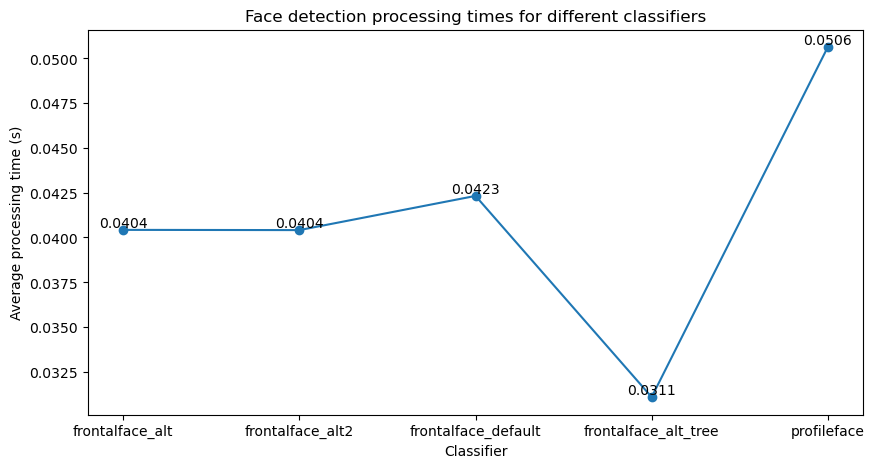

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(classifier_processing_times, 'o-')
plt.xticks(range(len(classfier_names)), classfier_names)
plt.xlabel("Classifier")
plt.ylabel("Average processing time (s)")
plt.title("Face detection processing times for different classifiers")

for i, avgProcessingTime in enumerate(classifier_processing_times):
    plt.text(i, avgProcessingTime, f"{avgProcessingTime:.4f}", ha='center', va='bottom')

plt.show()

- ##### `frontalface_alt`: Stump-based 20x20 gentle adaboost frontal face detector

- ##### `frontalface_alt2`: Tree-based 20x20 gentle adaboost frontal face detector

- ##### `frontalface_default`: Stump-based 24x24 discrete adaboost frontal face detector

- ##### `frontalface_alt_tree`: Stump-based 20x20 gentle adaboost frontal face detector. This detector uses tree of stage classifiers instead of a cascade

- ##### `profileface`: 20x20 profile face detector

- ##### Coming to the observed trends of processing times by these various classifiers, the first three have almost similar configurations - they either use stump-based or tree-based classifiers with 20x20 window sizes or 24x24 window sizes and hence, they have similar processing times as expected

- ##### The `frontalface_alt_tree` classifier has a lower processing time compared to the other classifiers as it uses a tree based decision making process instead of a cascade of classifiers which is generally faster

- ##### The `profileface` classifier has a slightly higher processing time compared to the other classifiers, which is expected as profile face detection is generally more complex than frontal face detection as the detector has to run on flipped images as well to align them in the correct direction for detection

<hr>

## Face detection visualization

In [19]:
face_detector   = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
directory       = "./data/q1/frames"
detections_path = "./data/q1/detections/"
_ = detect_faces(face_detector, directory, save=True, detections_path=detections_path, scaleFactor=1.2, minNeighbors=5, minSize=(15, 15))

Detecting faces: 100%|██████████| 720/720 [00:34<00:00, 20.86it/s, Avg Processing time=0.0289s]


### Find the video stitched from the frames with detections [here](https://drive.google.com/file/d/1c3aswtn80l-moAIQNmxky7QLaF3w4eij/view?usp=sharing)

### Cases when the detector works/fails

- ##### As can be seen in the initial parts of the video, when most of the face is clearly visible, i.e., the eyes, nose and mouth, the detector has no issues while detecting faces

- ##### The detector does not work when the face is inverted or when the face is partially occluded

- ##### At the 3rd second of the video, a "face" is detected on the shirt of Forrest Gump. This can be explained by the logic that there are 2 black circles on the same horizontal level separated by a small gap which the detector might have mistaken for eyes and hence detected a face

- ##### At the 11th second of the video, another "face" is detected on the girl's dress. At this instant, there is a bulge on the arm of the dress which gives a V-like shape with a black shadow on either side of the bulge. This could either have been interpreted as a nose or as the chin region and hence, the model would have detected this as a face

- ##### In the 28th second of the video, a "face" is detected on the bush which is lit by the sun. In this case, the middle part of the bush has a section which runs vertically down in the middle and also there are shadows due to the sun. The middle part might have been interpreted as a nose and the shadows as eyes and hence, the detector would have detected a face

<hr>

## Association-based tracking

In [3]:
face_detector = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
directory     = "./data/q1/frames"
detections, _ = detect_faces(face_detector, directory, return_detections=True, scaleFactor=1.2, minNeighbors=5, minSize=(15, 15))

Detecting faces:   0%|          | 0/720 [00:00<?, ?it/s]

Detecting faces: 100%|██████████| 720/720 [00:27<00:00, 25.84it/s, Avg Processing time=0.0277s]


In [4]:
def calculate_iou(prev_box, curr_box):
    x1, y1, w1, h1 = prev_box
    x2, y2, w2, h2 = curr_box

    xA = max(x1, x2)
    yA = max(y1, y2)
    xB = min(x1 + w1, x2 + w2)
    yB = min(y1 + h1, y2 + h2)

    interArea = max(0, xB - xA) * max(0, yB - yA)
    boxAArea  = w1 * h1
    boxBArea  = w2 * h2
    iou       = float(interArea) / (boxAArea + boxBArea - interArea)

    return iou

def track_faces(detections, iou_threshold=0.5, num_prev_frames=1):
    tracks = []
    track_id = 0

    progress_bar = tqdm.tqdm(total=len(detections))
    progress_bar.set_description("Tracking faces")

    for i, frame_detections in enumerate(detections):
        frame_tracks = []

        if len(frame_detections) > 0:
            if i == 0:
                for detection in frame_detections:
                    x, y, w, h = detection
                    frame_tracks.append((x, y, w, h, track_id))
                    track_id += 1

            else:
                isTracked = [False for _ in range(len(frame_detections))]

                for prev_frame in range(1, num_prev_frames + 1):
                    if i - prev_frame >= 0:
                        prev_frame_tracks = tracks[i - prev_frame]

                        for j, detection in enumerate(frame_detections):
                            if isTracked[j] is True:
                                continue
                            
                            max_iou = 0
                            max_iou_track = None

                            for prev_track in prev_frame_tracks:
                                iou = calculate_iou(prev_track[:4], detection)

                                if iou > max_iou:
                                    max_iou = iou
                                    max_iou_track = prev_track

                            if max_iou > iou_threshold:
                                x, y, w, h = detection
                                frame_tracks.append((x, y, w, h, max_iou_track[4]))
                                isTracked[j] = True

                for j, detection in enumerate(frame_detections):
                    if isTracked[j] is False:
                        x, y, w, h = detection
                        frame_tracks.append((x, y, w, h, track_id))
                        track_id += 1

        tracks.append(frame_tracks)
        progress_bar.update(1)

    return tracks

def label_tracks(tracks, frames_path, save=False, labels_path=None):
    if save is True and labels_path is not None:
        if not os.path.exists(labels_path):
            os.makedirs(labels_path)

    progress_bar = tqdm.tqdm(total=len(tracks))
    progress_bar.set_description("Labelling frames")

    for i, frame_tracks in enumerate(tracks):
        frame_name = f"{frames_path}/frames_{i + 1:03d}.jpg"
        img = cv2.imread(frame_name)

        for track in frame_tracks:
            x, y, w, h, track_id = track
            cv2.putText(img, str(track_id), (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        if save is True and labels_path is not None:
            cv2.imwrite(f"{labels_path}/frames_{i + 1:03d}.jpg", img)

        progress_bar.update(1)

##### Assumption: When there are multiple face detection is both frames, face detection with the highest IoU is considered as the same face in the previous frame

In [6]:
face_tracks = track_faces(detections, num_prev_frames=1)

labels_path = "./data/q1/labelled_frames/"
label_tracks(face_tracks, directory, save=True, labels_path=labels_path)

Labelling frames: 100%|██████████| 720/720 [00:14<00:00, 49.55it/s]


In [7]:
face_tracks = track_faces(detections, num_prev_frames=90)

labels_path = "./data/q1/labelled_frames/past_90_frames/"
label_tracks(face_tracks, directory, save=True, labels_path=labels_path)

Labelling frames: 100%|██████████| 720/720 [00:14<00:00, 50.50it/s]


- ##### 70 unique tracks were found in the video

- ##### Link to the video made by computing IoU only with the previous frame can be found [here](https://drive.google.com/file/d/1y5_MEEw4qDoEWq9wknk6mLJpMusaNSbX/view?usp=sharing)

- ##### Link to the video made by computing IoU with all the frames in the past 3 seconds/90 frames (so that the tracking is much better) can be found [here](https://drive.google.com/file/d/1Lu62cfEfgvA7qjW1W8BzA_vHTFNVlqzb/view?usp=sharing)

- ##### Different people are not associated with a single track with my configuratrion

- ##### But, a unique character is not associated with a unique track id due to the task of resetting the track id if the IoU is below a certain threshold. This can be noticed in the following timesteps:
  - Within the first second, we can see that the track resets on the girl when she is looking sideways and blinks her eyes. At that moment, most of the identifying features of a face are lost as the nose is also not very visible

  - Similarly at the 5th second, the track resets on Forrest Gump, when he is hit by a rock and he scrunches his face and covers his face as well. Again, the identifying features of a face - the eyes are closed and the nose and mouth are partially covered. Hence, the tracking fails in this case as well

  - Between the 10th and 11th seconds, the tracking goes haywire when the boys who are throwing the stones move rapidly. They are present at a distance from the camera and hence, their face occupies a relatively smaller portion in the frame. So, when they move rapidly, the IoU threshold is not met in spite of the adjacent frames having similar positions as the face itself occupies a smaller area. Hence, the tracking fails in this case as well

  - Between the 21st and 22nd seconds, the tracking fails to stay on the face of the boy who is cycling in the shadow of the tree due to the strong and rapid illumination changes on the face due to direct sunlight and shadows. The face is not clearly visible in the frames and hence, the tracking fails

<hr>

# YOLO Object Detection

## Data preparation

The data is stored in the [data/q2](./data/q2/) folder

The dataset used is the subset of the Open Images Dataset v7 corresponding to the ducks category

<hr>

## Understanding the YOLO object detector

### Difference between single shot detectors and R-CNN series models:
|                                        Single-Shot Detectors                                        |                                                                                                                           R-CNN model series                                                                                                                           |
|:---------------------------------------------------------------------------------------------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| There is only a single stage for bounding box prediction and classfication without region proposals | These models involve a two-stage prediction pipeline, where the image is first passed through a convolutional network to obtain region proposals. These proposals are then sent to regresion and classification modules to predict the bounding boxes and classify them |
|                               They are less computationally-intensive                               |                                                                       These models require relatively higher amounts of computation due to the model size and also due to more number of modules                                                                       |
|                  Inference time is much smaller due to a single stage of processing                 |                                                                                   The model takes a lot of time for inference due to time-intensive procedure in each of the modules                                                                                   |
|                                     Real-time inference possible                                    |                                                                                                                   Real-time inference is not possible                                                                                                                  |
|                   Accuracy is relatively lesser due to lesser amount of processing                  |                                                                                                    Model guarantees high levels of accuracy and quality of detection                                                                                                   |

### Comparision between 3 YOLO models
- #### YOLOV1:
  - The first 20 convolutional layers of the network are pre-trained on ImageNet using a temporary average pooling layer and also an FC layer
  - Later, the final layer of the model is used for detection and it produces both class proabilities and also predicts bounding box coordinates
  - YOLO divides an image into an `SxS` grid. Within each grid, if the center of the bounding box of an object falls in that grid, then that cell is responsible to detect that object
  - Each cell predicts `B` bounding boxes and their confidence scores, which represents the extent to which the model thinks the boxes are accurate

  - Since we want a single bounding box per cell during training, the model assigns the box with the highest IoU with the ground truth box to be responsible for the prediction
  - The model also uses Non-Maximal Suppression (NMS) to remove redundant bounding boxes and to output a single bounding box for each object in the image

- #### YOLOV2:
  - The backbone in this model was changed from ImageNet to Darknet-19, which is a variant of the VGGNet architecture

  - This model also saw the introduction of anchor boxes with predefined dimensions and aspect ratios and scales
  - During prediction, the model uses a combination of the position of the anchor boxes along with some offsets to determine the final detections
  - This model also used a new loss function which performs MSE loss over the locations of the bounding boxes and also the class probabilities with the corresponding ground truth values

- #### YOLOV3:
  - The backbone in this model was again changed, this time to Darknet-53, which is a variant of the ResNet architecture with 53 convolutional layers

  - One major improvement in this model was the introduction of variable anchor boxes which can be scaled and their aspect ratios can also be varied, which helps the model better match the size and shapes of many more objects
  - The biggest introduction, though, was the concept of "Feature Pyramid Networks" (FPNs) which are CNN-based models for multi-scale object detection. This is done by obtaining feature maps at different scales and a pyramid is formed with these maps at different levels. Objects at different scales are detected by various feature maps at different maps at different levels of the pyramid
  - These FPNs allow the model to detect objects at different scales and hence, objects that have very small sizes as well

<hr>

## Hands on with ultralytics

In [1]:
import os
import gc
import torch
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

SEED = 42
os.environ['WANDB_DISABLED'] = 'true'

### Number of parameters and convolutional layers in YOLO models

##### From [this](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/models/v8/yolov8.yaml) file of the ultralytics github repo, we can see that `yolov8n` model has `3,157,200` parameters and `255` convolutional layers, while the `yolov8m` model has `25,902,640` parameters and `295` convolutional layers

<hr>

## Training YOLO variants

### `train1` and `train2` images and labels dataset preparation

In [2]:
import os
import shutil
import numpy as np

np.random.seed(SEED)

train2_images  = os.listdir("data/q2/2/images/train")
file_basenames = [os.path.splitext(os.path.basename(file))[0] for file in train2_images]

file_indices = np.random.choice(len(file_basenames), 100, replace=False)

if not os.path.exists("data/q2/1/"):
    if not os.path.exists("data/q2/1/images/train"):
        os.makedirs("data/q2/1/images/train")

    if not os.path.exists("data/q2/1/labels/train"):
        os.makedirs("data/q2/1/labels/train")

    shutil.copy("data/q2/2/config.yaml", "data/q2/1/config.yaml")
    shutil.copy("data/q2/2/config_train_metrics.yaml", "data/q2/1/config_train_metrics.yaml")

    for index in file_indices:
        image_name = f"{file_basenames[index]}.png"
        label_name = f"{file_basenames[index]}.txt"

        shutil.copy(f"data/q2/2/images/train/{image_name}", f"data/q2/1/images/train/{image_name}")
        shutil.copy(f"data/q2/2/labels/train/{label_name}", f"data/q2/1/labels/train/{label_name}")

<hr>

### Training 3 YOLO models on both datasets

In [3]:
models        = ["yolov8n.yaml", "yolov8n.pt", "yolov8m.pt"]
datasets      = ["1", "2"]
train_results = []
val_results   = []

gpu_avail   = torch.cuda.is_available()
yolo_device = [0, 1, 2] if gpu_avail else "cpu"

for model in models:
    for dataset in datasets:
        gc.collect()
        torch.cuda.empty_cache()

        yolov8_model = YOLO(model)

        result = yolov8_model.train(data=f"data/q2/{dataset}/config.yaml", epochs=20, batch=48, seed=SEED, device=yolo_device, workers=4, project=f"{model.replace('.','_')}_{dataset}")

        train_metric = yolov8_model.val(data=f"data/q2/{dataset}/config_train_metrics.yaml", batch=48, device=yolo_device, workers=4, project=f"{model.replace('.','_')}_{dataset}")
        val_metric   = yolov8_model.val(data=f"data/q2/{dataset}/config.yaml",               batch=48, device=yolo_device, workers=4, project=f"{model.replace('.','_')}_{dataset}")

        train_results.append(train_metric.box.ap50)
        val_results.append(val_metric.box.ap50)

        del train_metric
        del val_metric
        del result
        del yolov8_model

        gc.collect()
        torch.cuda.empty_cache()

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_yaml_1, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_yaml_1/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:01<00:00, 5.75MB/s]


AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:03<00:00, 119.97it/s]


train: New cache created: /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 109.62it/s]


val: New cache created: /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache
Plotting labels to yolov8n_yaml_1/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_yaml_1/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      3.412      4.298      4.277         17        640: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]


                   all         50         52    0.00231      0.654    0.00588    0.00299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      3.579      4.309      4.271         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


                   all         50         52    0.00225      0.635    0.00543     0.0018

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G      3.285      4.258      4.231         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]


                   all         50         52    0.00226      0.635    0.00756    0.00198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G      3.304      4.172      4.218         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52    0.00224      0.635    0.00672      0.002

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G      3.358      4.125      4.159         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52    0.00226      0.635    0.00519    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G      3.223      3.974      4.101         15        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


                   all         50         52    0.00226      0.635     0.0059    0.00212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.33G      3.159      4.094      4.011          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]


                   all         50         52    0.00227      0.635     0.0082    0.00248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G      3.156       3.91      3.944         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52    0.00234      0.654    0.00725    0.00217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G      2.917       3.89      3.763         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]


                   all         50         52    0.00223      0.615    0.00615    0.00205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G      2.986      3.823      3.699         12        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


                   all         50         52    0.00229      0.635     0.0871      0.022
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.33G      2.699      4.209      3.549          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52     0.0022      0.596    0.00693    0.00228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.33G      2.809      4.084      3.446          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


                   all         50         52    0.00255      0.712     0.0216    0.00639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.33G      2.751      4.186      3.463          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


                   all         50         52     0.0166     0.0192     0.0168     0.0039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.33G      2.684      4.043      3.306          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]


                   all         50         52     0.0379     0.0385     0.0358     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.33G      2.662      3.889      3.255          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52     0.0217      0.115     0.0123    0.00383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.33G       2.61      3.724      3.228          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]


                   all         50         52     0.0416      0.596     0.0611     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.33G      2.585      3.938      3.214          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


                   all         50         52     0.0436      0.519      0.082     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.33G      2.755      3.821      3.244          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


                   all         50         52     0.0572     0.0385     0.0504     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.33G      2.531      3.799      3.204          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.161      0.115     0.0703     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G      2.503      3.856      3.223          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52       0.11      0.146     0.0659     0.0184

20 epochs completed in 0.019 hours.
Optimizer stripped from yolov8n_yaml_1/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_yaml_1/train/weights/best.pt, 6.2MB

Validating yolov8n_yaml_1/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52    0.00236      0.654     0.0857     0.0216
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_yaml_1/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▁▁▁▁▁▁▁▁█▁▂▂▄▂▆█▅▇█
wandb:     metrics/mAP50-95(B) ▁▁▁▁▁▁▁▁▁█▁▃▂▄▂▆█▅▇█
wandb:    metrics/precision(B) ▁▁▁▁▁▁▁▁▁▁▁▁▂▃▂▃▃▃█▁
wandb:       metrics/recall(B) ▇▇▇▇▇▇▇▇▇▇▇█▁▁▂▇▆▁▂▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ▇█▆▆▇▆▅▅▄▄▂▃▃▂▂▂▂▃▁▁
wandb:          train/cls_loss ██▇▆▆▄▅▃▃▂▇▅▇▅▃▁▄▂▂▃
wandb:          train/dfl_loss ██��█▇▇▆▆▅▄▃▃▃▂▁▁▁▁▁▁
wandb:            val/box_loss ▆▆▆▆▅▅▅▆▇▇█▅▅▃▂▁▁▂▁▁
wandb:            val/cls_loss ▃▃▃▃▃▃▃▃▂▂▂▂▂▁█▁▁▁▁▂
wandb:            val/dfl_loss ▆▆▆▆▆▆▅▆▇▇█▅▄▃█▁▁▁▁▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.59it/s]


                   all        400        418    0.00159      0.411     0.0114    0.00329
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to yolov8n_yaml_1/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         50         52    0.00228      0.654     0.0907      0.027
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to yolov8n_yaml_1/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=data/q2/2/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_yaml_2, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, mul

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_yaml_2/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_yaml_2/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_yaml_2/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      3.412      4.298      4.277         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.37it/s]


                   all         50         52    0.00231      0.654    0.00588    0.00299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      3.579      4.309      4.271         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]


                   all         50         52    0.00225      0.635    0.00543     0.0018

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G      3.285      4.258      4.231         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52    0.00226      0.635    0.00756    0.00198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G      3.304      4.172      4.218         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]


                   all         50         52    0.00224      0.635    0.00672      0.002

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G      3.358      4.125      4.159         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]


                   all         50         52    0.00226      0.635    0.00519    0.00182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G      3.223      3.974      4.101         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


                   all         50         52    0.00226      0.635     0.0059    0.00212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.33G      3.159      4.094      4.011          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]


                   all         50         52    0.00227      0.635     0.0082    0.00248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G      3.156       3.91      3.944         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]


                   all         50         52    0.00234      0.654    0.00725    0.00217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G      2.917       3.89      3.763         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]


                   all         50         52    0.00223      0.615    0.00615    0.00205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G      2.986      3.823      3.699         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52    0.00229      0.635     0.0871      0.022
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.33G      2.699      4.209      3.549          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.11it/s]


                   all         50         52     0.0022      0.596    0.00693    0.00228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.33G      2.809      4.084      3.446          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         50         52    0.00255      0.712     0.0216    0.00639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.33G      2.751      4.186      3.463          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]


                   all         50         52     0.0166     0.0192     0.0168     0.0039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.33G      2.684      4.043      3.306          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]


                   all         50         52     0.0379     0.0385     0.0358     0.0107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.33G      2.662      3.889      3.255          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]


                   all         50         52     0.0217      0.115     0.0123    0.00383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.33G       2.61      3.724      3.228          5        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52     0.0416      0.596     0.0611     0.0166

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.33G      2.585      3.938      3.214          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


                   all         50         52     0.0436      0.519      0.082     0.0214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.33G      2.755      3.821      3.244          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]


                   all         50         52     0.0572     0.0385     0.0504     0.0143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.33G      2.531      3.799      3.204          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


                   all         50         52      0.161      0.115     0.0703     0.0181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G      2.503      3.856      3.223          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]


                   all         50         52       0.11      0.146     0.0659     0.0184

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_yaml_2/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_yaml_2/train/weights/best.pt, 6.2MB

Validating yolov8n_yaml_2/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]


                   all         50         52    0.00236      0.654     0.0857     0.0216
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_yaml_2/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▁▁▁▁▁▁▁▁█▁▂▂▄▂▆█▅▇█
wandb:     metrics/mAP50-95(B) ▁▁▁▁▁▁▁▁▁█▁▃▂▄▂▆█▅▇█
wandb:    metrics/precision(B) ▁▁▁▁▁▁▁▁▁▁▁▁▂▃▂▃▃▃█▁
wandb:       metrics/recall(B) ▇▇▇▇▇▇▇▇▇▇▇█▁▁▂▇▆▁▂▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ▇█▆▆▇▆▅▅▄▄▂▃▃▂▂▂▂▃▁▁
wandb:          train/cls_loss ██▇▆▆▄▅▃▃▂▇▅▇▅▃▁▄▂▂▃
wandb:          train/dfl_loss ██��█▇▇▆▆▅▄▃▃▃▂▁▁▁▁▁▁
wandb:            val/box_loss ▆▆▆▆▅▅▅▆▇▇█▅▅▃▂▁▁▂▁▁
wandb:            val/cls_loss ▃▃▃▃▃▃▃▃▂▂▂▂▂▁█▁▁▁▁▂
wandb:            val/dfl_loss ▆▆▆▆▆▆▅▆▇▇█▅▄▃█▁▁▁▁▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        400        418    0.00159      0.411     0.0114    0.00329
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_yaml_2/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.11it/s]


                   all         50         52    0.00228      0.654     0.0907      0.027
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov8n_yaml_2/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_pt_1, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_s

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_pt_1/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_pt_1/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_pt_1/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.113      3.138      1.251         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]


                   all         50         52    0.00333      0.962      0.583      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.024      2.628      1.165         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         50         52     0.0034      0.981      0.643      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9625      2.231      1.144         10        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


                   all         50         52      0.566      0.827      0.746      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8838      1.986      1.082         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


                   all         50         52          1      0.183      0.757      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8408      1.901      1.044         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]


                   all         50         52          1       0.17      0.725      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.7952      1.826       1.05         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52      0.798      0.455      0.663      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8248      1.747      1.067          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52      0.904      0.423      0.698      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8207      1.619      1.039         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]


                   all         50         52      0.705      0.645      0.704       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7302      1.519      1.019         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.703      0.635      0.682      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.8113      1.625      1.035         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]


                   all         50         52      0.743      0.712      0.689      0.464
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7687      2.098      1.097          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]


                   all         50         52      0.794      0.673        0.7      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7491      1.901      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52      0.716      0.731      0.698      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8098      2.007       1.06          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.71it/s]


                   all         50         52      0.719      0.737       0.75       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7681      1.804      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52       0.75      0.751      0.754      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G      0.744      1.753      1.006          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]


                   all         50         52      0.784      0.712      0.778      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7266      1.544      1.078          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.803      0.707      0.759      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6374      1.486     0.9503          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.814      0.692      0.792      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G      0.722      1.569     0.9831          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52       0.86      0.712      0.824       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6129      1.415     0.9151          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]


                   all         50         52      0.883      0.712       0.81      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6562      1.403      1.012          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


                   all         50         52      0.809       0.75      0.806      0.646

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_pt_1/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_pt_1/train/weights/best.pt, 6.2MB

Validating yolov8n_pt_1/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]


                   all         50         52      0.884      0.712      0.808      0.672
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to yolov8n_pt_1/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▃▆▆▅▃▄▅▄▄▄▄▆▆▇▆▇███
wandb:     metrics/mAP50-95(B) ▁▃▄▆▄▃▄▃▄▂▃▂▅▆▆▆▆▇██
wandb:    metrics/precision(B) ▁▁▅██▇▇▆▆▆▇▆▆▆▆▇▇▇▇▇
wandb:       metrics/recall(B) ██▇▁▁▃▃▅▅▆▅▆▆▆▆▆▆▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▄▃▃▃▁▃▁▂
wandb:          train/cls_loss █▆▄▃▃▃▂▂▁▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▄▅▄▄▄▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▃▂▄▅▄▅▆▇▇█▆▄▆▅▅▄▃▃
wandb:            val/cls_loss █▇▇▇▇▇▇▆▅▅▅▄▃▂▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▃▄▃▄▆▆▆█▅▃▅▄▄▃▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        400        418      0.844      0.756      0.847      0.734
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolov8n_pt_1/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all         50         52      0.725      0.808      0.795      0.666
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov8n_pt_1/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/2/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_pt_2, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_sca

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_pt_2/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_pt_2/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_pt_2/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.113      3.138      1.251         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.42it/s]


                   all         50         52    0.00333      0.962      0.583      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.024      2.628      1.165         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]


                   all         50         52     0.0034      0.981      0.643      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9625      2.231      1.144         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]


                   all         50         52      0.566      0.827      0.746      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8838      1.986      1.082         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52          1      0.183      0.757      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8408      1.901      1.044         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52          1       0.17      0.725      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.7952      1.826       1.05         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.17it/s]


                   all         50         52      0.798      0.455      0.663      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8248      1.747      1.067          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]


                   all         50         52      0.904      0.423      0.698      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8207      1.619      1.039         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


                   all         50         52      0.705      0.645      0.704       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7302      1.519      1.019         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]


                   all         50         52      0.703      0.635      0.682      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.8113      1.625      1.035         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]


                   all         50         52      0.743      0.712      0.689      0.464
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7687      2.098      1.097          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52      0.794      0.673        0.7      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7491      1.901      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]


                   all         50         52      0.716      0.731      0.698      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8098      2.007       1.06          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]


                   all         50         52      0.719      0.737       0.75       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7681      1.804      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


                   all         50         52       0.75      0.751      0.754      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G      0.744      1.753      1.006          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         50         52      0.784      0.712      0.778      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7266      1.544      1.078          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


                   all         50         52      0.803      0.707      0.759      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6374      1.486     0.9503          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52      0.814      0.692      0.792      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G      0.722      1.569     0.9831          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]


                   all         50         52       0.86      0.712      0.824       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6129      1.415     0.9151          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


                   all         50         52      0.883      0.712       0.81      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6562      1.403      1.012          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52      0.809       0.75      0.806      0.646

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_pt_2/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_pt_2/train/weights/best.pt, 6.2MB

Validating yolov8n_pt_2/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         50         52      0.884      0.712      0.808      0.672
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_pt_2/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▃▆▆▅▃▄▅▄▄▄▄▆▆▇▆▇███
wandb:     metrics/mAP50-95(B) ▁▃▄▆▄▃▄▃▄▂▃▂▅▆▆▆▆▇██
wandb:    metrics/precision(B) ▁▁▅██▇▇▆▆▆▇▆▆▆▆▇▇▇▇▇
wandb:       metrics/recall(B) ██▇▁▁▃▃▅▅▆▅▆▆▆▆▆▆▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▄▃▃▃▁▃▁▂
wandb:          train/cls_loss █▆▄▃▃▃▂▂▁▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▄▅▄▄▄▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▃▂▄▅▄▅▆▇▇█▆▄▆▅▅▄▃▃
wandb:            val/cls_loss █▇▇▇▇▇▇▆▅▅▅▄▃▂▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▃▄▃▄▆▆▆█▅▃▅▄▄▃▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]


                   all        400        418      0.844      0.756      0.847      0.734
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to yolov8n_pt_2/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


                   all         50         52      0.725      0.808      0.795      0.666
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to yolov8n_pt_2/train3


100%|██████████| 49.7M/49.7M [00:21<00:00, 2.38MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8m_pt_1, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, 

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8m_pt_1/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8m_pt_1/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000375), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8m_pt_1/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.77G      1.134      4.519      1.279         17        640: 100%|██████████| 9/9 [00:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         50         52      0.747      0.692       0.69      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.65G     0.9786      2.689      1.158         12        640: 100%|██████████| 9/9 [00:06<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52      0.815      0.596       0.72      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.64G      0.834      2.082      1.077         10        640: 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         50         52      0.595      0.596      0.587      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.64G     0.8343      1.615      1.085         14        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]


                   all         50         52      0.263      0.173      0.185      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.85G     0.8338      1.504      1.084         11        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.414      0.212      0.194     0.0779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.86G     0.7856      1.402      1.094         15        640: 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


                   all         50         52      0.493      0.635      0.551      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.86G     0.8121      1.344      1.141          8        640: 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         50         52       0.59      0.615      0.595      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.64G     0.8273      1.344      1.121         16        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         50         52      0.482      0.519      0.469       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.86G     0.8109      1.256      1.089         12        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.542       0.25      0.262      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.64G     0.8421      1.275      1.096         12        640: 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.658      0.519      0.536      0.323
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.86G     0.8474      1.474      1.203          5        640: 100%|██████████| 9/9 [00:06<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52        0.4      0.269      0.238      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.85G     0.8882      1.327      1.205          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         50         52      0.381      0.538      0.432      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.64G     0.8611      1.432       1.18          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52       0.46      0.635      0.566      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.85G     0.8486      1.285       1.12          6        640: 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52       0.33      0.404      0.333      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.64G     0.8257      1.172      1.145          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]


                   all         50         52      0.484      0.613      0.508      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.64G     0.7541      1.022      1.103          5        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52      0.778      0.673      0.698      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.85G      0.693     0.9156      1.003          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         50         52      0.651      0.712      0.706      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.64G     0.7328     0.8978      1.019          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         50         52       0.71      0.654      0.623      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.64G     0.5988     0.8202     0.9618          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52      0.727      0.808      0.778      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.85G     0.6158     0.7324      1.027          7        640: 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         50         52      0.807      0.805       0.79      0.571

20 epochs completed in 0.054 hours.
Optimizer stripped from yolov8m_pt_1/train/weights/last.pt, 52.0MB
Optimizer stripped from yolov8m_pt_1/train/weights/best.pt, 52.0MB

Validating yolov8m_pt_1/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


                   all         50         52      0.747      0.692       0.69      0.612
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to yolov8m_pt_1/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▇▇▆▁▁▅▆▄▂▅▂▄▅▃▅▇▇▆█▇
wandb:     metrics/mAP50-95(B) ██▅▂▁▅▆▄▁▄▁▃▅▂▄▆▆▆██
wandb:    metrics/precision(B) ▇█▅▁▃▄▅▄▅▆▃▃▄▂▄█▆▇▇▇
wandb:       metrics/recall(B) ▇▆▆▁▁▆▆▅▂▅▂▅▆▄▆▇▇▆█▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▄▄▄▃▄▄▄▄▄▅▄▄▄▃▂▃▁▁
wandb:          train/cls_loss █▅▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/dfl_loss █▅��▄▄▄▅▅▄▄▆▆▆▄▅▄▂▂▁▂
wandb:            val/box_loss ▁▂▃▄▆▅▃▅▆▆█▇▄▆▄▄▄▄▃▃
wandb:            val/cls_loss ▂▂▂▃▃▂▁▂▇▂█▄▃▃▂▁▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▃▅▄▃▅▇▅█▇▄▆▃▃▃▃▂▃
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]


                   all        400        418      0.492      0.469      0.378      0.289
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8m_pt_1/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.15s/it]


                   all         50         52      0.666      0.731      0.675      0.601
Speed: 0.2ms preprocess, 11.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov8m_pt_1/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data/q2/2/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8m_pt_2, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_sc

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8m_pt_2/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8m_pt_2/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000375), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8m_pt_2/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      8.77G      1.134      4.519      1.279         17        640: 100%|██████████| 9/9 [00:07<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]


                   all         50         52      0.747      0.692       0.69      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      8.65G     0.9786      2.689      1.158         12        640: 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


                   all         50         52      0.815      0.596       0.72      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.64G      0.834      2.082      1.077         10        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.595      0.596      0.587      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      8.64G     0.8343      1.615      1.085         14        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         50         52      0.263      0.173      0.185      0.149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.85G     0.8338      1.504      1.084         11        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         50         52      0.414      0.212      0.194     0.0779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      8.86G     0.7856      1.402      1.094         15        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


                   all         50         52      0.493      0.635      0.551      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      8.86G     0.8121      1.344      1.141          8        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52       0.59      0.615      0.595      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      8.64G     0.8273      1.344      1.121         16        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         50         52      0.482      0.519      0.469       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.86G     0.8109      1.256      1.089         12        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]


                   all         50         52      0.542       0.25      0.262      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      8.64G     0.8421      1.275      1.096         12        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.658      0.519      0.536      0.323
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      8.86G     0.8474      1.474      1.203          5        640: 100%|██████████| 9/9 [00:06<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         50         52        0.4      0.269      0.238      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      8.85G     0.8882      1.327      1.205          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]


                   all         50         52      0.381      0.538      0.432      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.64G     0.8611      1.432       1.18          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]


                   all         50         52       0.46      0.635      0.566      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      8.85G     0.8486      1.285       1.12          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52       0.33      0.404      0.333      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.64G     0.8257      1.172      1.145          6        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.484      0.613      0.508      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.64G     0.7541      1.022      1.103          5        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]


                   all         50         52      0.778      0.673      0.698      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.85G      0.693     0.9156      1.003          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]


                   all         50         52      0.651      0.712      0.706      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      8.64G     0.7328     0.8978      1.019          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]


                   all         50         52       0.71      0.654      0.623      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.64G     0.5988     0.8202     0.9618          6        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]


                   all         50         52      0.727      0.808      0.778      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      8.85G     0.6158     0.7324      1.027          7        640: 100%|██████████| 9/9 [00:06<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]


                   all         50         52      0.807      0.805       0.79      0.571

20 epochs completed in 0.054 hours.
Optimizer stripped from yolov8m_pt_2/train/weights/last.pt, 52.0MB
Optimizer stripped from yolov8m_pt_2/train/weights/best.pt, 52.0MB

Validating yolov8m_pt_2/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]


                   all         50         52      0.747      0.692       0.69      0.612
Speed: 0.2ms preprocess, 11.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8m_pt_2/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▇▇▆▁▁▅▆▄▂▅▂▄▅▃▅▇▇▆█▇
wandb:     metrics/mAP50-95(B) ██▅▂▁▅▆▄▁▄▁▃▅▂▄▆▆▆██
wandb:    metrics/precision(B) ▇█▅▁▃▄▅▄▅▆▃▃▄▂▄█▆▇▇▇
wandb:       metrics/recall(B) ▇▆▆▁▁▆▆▅▂▅▂▅▆▄▆▇▇▆█▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▄▄▄▃▄▄▄▄▄▅▄▄▄▃▂▃▁▁
wandb:          train/cls_loss █▅▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/dfl_loss █▅��▄▄▄▅▅▄▄▆▆▆▄▅▄▂▂▁▂
wandb:            val/box_loss ▁▂▃▄▆▅▃▅▆▆█▇▄▆▄▄▄▄▃▃
wandb:            val/cls_loss ▂▂▂▃▃▂▁▂▇▂█▄▃▃▂▁▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▃▅▄▃▅▇▅█▇▄▆▃▃▃▃▂▃
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]


                   all        400        418      0.492      0.469      0.378      0.289
Speed: 0.1ms preprocess, 8.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8m_pt_2/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.14s/it]


                   all         50         52      0.666      0.731      0.675      0.601
Speed: 0.2ms preprocess, 10.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to yolov8m_pt_2/train3


<hr>

### AP50 metrics of all trained models

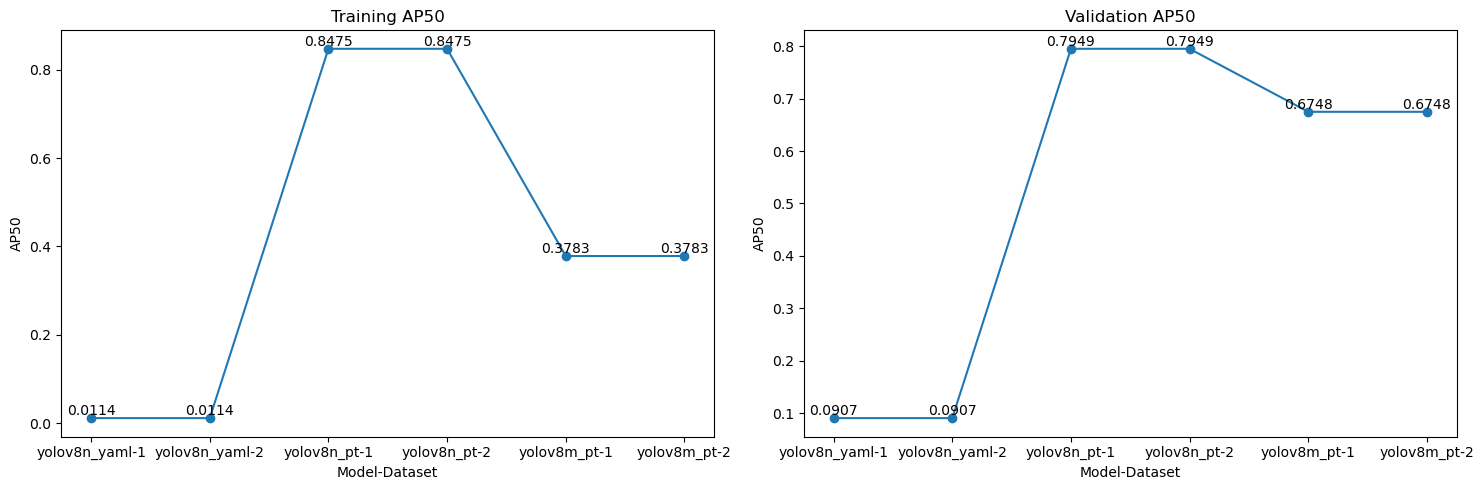

In [4]:
%matplotlib inline

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

train_plot_labels = []
for model in models:
    for dataset in datasets:
        train_plot_labels.append(f"{model.replace('.','_')}-{dataset}")

axs[0].plot(train_plot_labels, train_results, marker='o')

for i, train_result in enumerate(train_results):
    axs[0].text(i, train_result, f"{train_result[0]:.4f}", ha='center', va='bottom')

val_plot_labels = []
for model in models:
    for dataset in datasets:
        val_plot_labels.append(f"{model.replace('.','_')}-{dataset}")

axs[1].plot(val_plot_labels, val_results, marker='o')

for i, val_result in enumerate(val_results):
    axs[1].text(i, val_result, f"{val_result[0]:.4f}", ha='center', va='bottom')

axs[0].set_title("Training AP50")
axs[0].set_xlabel("Model-Dataset")
axs[0].set_ylabel("AP50")

axs[1].set_title("Validation AP50")
axs[1].set_xlabel("Model-Dataset")
axs[1].set_ylabel("AP50")

plt.tight_layout()
plt.show()

### (a) Dataset size v/s model performance
##### Increasing the dataset size gives a sizable boost to both the yolov8n models (one initialized from scratch and the other that was finetuned) for both the train and validation AP50 scores
##### The yolov8m model gains a major improvement in its validation AP50 score while its train AP50 score reduces slightly
- This is probably explained by overfitting of the more complex and larger model on a smaller dataset

### (b) Model size v/s performance
##### Comparing the finetuned versions of the yolov8n and yolov8m models, we can see that the yolov8n model outperforms the bigger model on both the datasets, which is expected for the smaller dataset as the smaller model has lesser chances of overfitting to the training data.
##### For the larger dataset, the chance of overfitting reduces for both the models and they achieve similar performance on the validation set inspite of yolov8m having higher training accuracy than the smaller model
- This again indicates the possibility of higher degree of overfitting by the bigger model

##### Hence, we cannot generalize that performance improves with model size

<hr>

### Visualizing model results on validation set

image 1/1 /home2/punnavajhala.prakash/Object_Detection/data/q2/2/images/val/0a411d151f978818.png: 480x640 1 duck, 72.0ms
Speed: 3.4ms preprocess, 72.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home2/punnavajhala.prakash/Object_Detection/data/q2/2/images/val/119d707a575b7721.png: 480x640 2 ducks, 11.0ms
Speed: 2.6ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home2/punnavajhala.prakash/Object_Detection/data/q2/2/images/val/11ef736947e18c52.png: 384x640 1 duck, 69.2ms
Speed: 2.2ms preprocess, 69.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home2/punnavajhala.prakash/Object_Detection/data/q2/2/images/val/1edeebd1128c85c6.png: 448x640 (no detections), 65.8ms
Speed: 2.5ms preprocess, 65.8ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


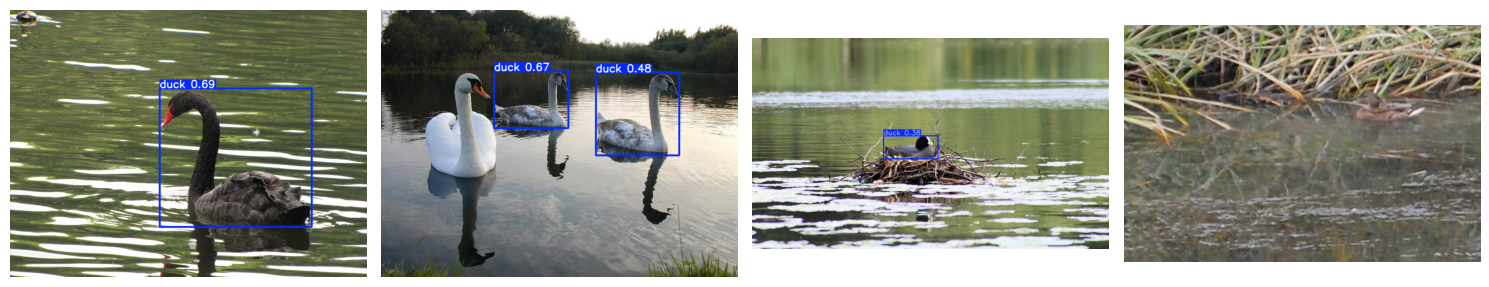

In [6]:
%matplotlib inline

best_model = YOLO("yolov8n_pt_2/train/weights/last.pt").to("cuda")

val_images_path = "data/q2/2/images/val"
val_images = np.array(os.listdir("data/q2/2/images/val"))

val_images = ["./data/q2/2/images/val/0a411d151f978818.png", "./data/q2/2/images/val/119d707a575b7721.png", "./data/q2/2/images/val/11ef736947e18c52.png", "./data/q2/2/images/val/1edeebd1128c85c6.png"]

fig, axs = plt.subplots(1, 4, figsize=(15, 10))

for i, img_path in enumerate(val_images):
    results = best_model(img_path)

    im_array = results[0].plot()
    im_array = im_array[..., ::-1]

    axs[i].imshow(im_array)
    axs[i].axis("off")

plt.tight_layout()
plt.show()

### The above set of images clearly describe the performance of the best model in various scenarios

##### The first image is a straightforward task for the model as it is a single duck at the center of the image and the model is able to detect it fairly easily
##### In the second image, there are three ducks along with very clear reflections of them in the water. Interestingly, the model only detects the actual ducks and disregards the reflections, which is a good indication of its performance
##### In the third image, the duck is very well-hidden in a nest-like structure and is barely visible. Yet, the model is able to detect it with a good enough confidence value
##### Coming to the last image, which is a very challenging one, as the image itself is of very low quality and on top of that, the duck perfectly blends with the background. A human himself might find it difficult to detect the duck and requires close inspection. Considering the difficulty, it is obvious that the model fails to detect the duck in this image

<hr>

## Impact of Augmentations

### Augmentations used

#### Yes, the model does indeed use some augmentations by default

#### The following augmentations are used by default:
- `hsv_h`: Adjusts the hue of the image by a fraction of the color wheel, introducing color variability. Helps the model generalize across different lighting conditions.

- `hsv_s`: Alters the saturation of the image by a fraction, affecting the intensity of colors. Useful for simulating different environmental conditions.

- `hsv_v`: Modifies the value (brightness) of the image by a fraction, helping the model to perform well under various lighting conditions.

- `translate`: Translates the image horizontally and vertically by a fraction of the image size, aiding in learning to detect partially visible objects.

- `scale`: Scales the image by a gain factor, simulating objects at different distances from the camera.

- `fliplr`: Flips the image left to right with the specified probability, useful for learning symmetrical objects and increasing dataset diversity.

- `mosaic`: Combines four training images into one, simulating different scene compositions and object interactions. Highly effective for complex scene understanding.
  - This augmentation is stopped in the last `10` training epochs by default using the `close_mosaic` parameter to stabilize training before completion.

- `erasing`: Randomly erases a portion of the image during classification training, encouraging the model to focus on less obvious features for recognition.

<hr>

### Performance comparision of models with and without augmentations

In [7]:
augments = [True, False]

no_aug = dict(
    hsv_h = 0,
    hsv_s = 0,
    hsv_v = 0,
    translate = 0,
    scale = 1,
    fliplr = 0,
    mosaic = 0,
    erasing = 0
)

aug_train_metrics = []
aug_val_metrics   = []

for augment in augments:
    gc.collect()
    torch.cuda.empty_cache()

    model = YOLO("yolov8n.pt")

    if augment is True:
        result = model.train(data="data/q2/1/config.yaml", epochs=20, batch=48, seed=SEED, device=yolo_device, workers=4, project=f"yolov8n_aug_{augment}")

    else:
        result = model.train(data="data/q2/1/config.yaml", epochs=20, batch=48, seed=SEED, device=yolo_device, workers=4, project=f"yolov8n_aug_{augment}", **no_aug)

    train_metric = model.val(data="data/q2/1/config_train_metrics.yaml", batch=48, device=yolo_device, workers=4, project=f"yolov8n_aug_{augment}")
    val_metric   = model.val(data="data/q2/1/config.yaml",               batch=48, device=yolo_device, workers=4, project=f"yolov8n_aug_{augment}")

    aug_train_metrics.append(train_metric.box.map50)
    aug_val_metrics.append(val_metric.box.map50)

    del train_metric
    del val_metric
    del result
    del model

    gc.collect()
    torch.cuda.empty_cache()

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_aug_True, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride

Model summary: 225 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
DDP: debug command /home2/punnavajhala.prakash/miniconda3/envs/salad/bin/python -m torch.distributed.run --nproc_per_node 3 --master_port 45003 /home2/punnavajhala.prakash/.config/Ultralytics/DDP/_temp_kg5xyplw140700536320976.py
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_aug_True/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_aug_True/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_aug_True/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.113      3.138      1.251         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


                   all         50         52    0.00333      0.962      0.583      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.024      2.628      1.165         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]


                   all         50         52     0.0034      0.981      0.643      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9625      2.231      1.144         10        640: 100%|██████████| 9/9 [00:01<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.93it/s]


                   all         50         52      0.566      0.827      0.746      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8838      1.986      1.082         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


                   all         50         52          1      0.183      0.757      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8408      1.901      1.044         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52          1       0.17      0.725      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.7952      1.826       1.05         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


                   all         50         52      0.798      0.455      0.663      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8248      1.747      1.067          8        640: 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.63it/s]


                   all         50         52      0.904      0.423      0.698      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8207      1.619      1.039         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]


                   all         50         52      0.705      0.645      0.704       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7302      1.519      1.019         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]


                   all         50         52      0.703      0.635      0.682      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.8113      1.625      1.035         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


                   all         50         52      0.743      0.712      0.689      0.464
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7687      2.098      1.097          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.794      0.673        0.7      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7491      1.901      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         50         52      0.716      0.731      0.698      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8098      2.007       1.06          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


                   all         50         52      0.719      0.737       0.75       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7681      1.804      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


                   all         50         52       0.75      0.751      0.754      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G      0.744      1.753      1.006          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]


                   all         50         52      0.784      0.712      0.778      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7266      1.544      1.078          5        640: 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.84it/s]


                   all         50         52      0.803      0.707      0.759      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6374      1.486     0.9503          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


                   all         50         52      0.814      0.692      0.792      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G      0.722      1.569     0.9831          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]


                   all         50         52       0.86      0.712      0.824       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6129      1.415     0.9151          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]


                   all         50         52      0.883      0.712       0.81      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6562      1.403      1.012          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]


                   all         50         52      0.809       0.75      0.806      0.646

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_aug_True/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_aug_True/train/weights/best.pt, 6.2MB

Validating yolov8n_aug_True/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]


                   all         50         52      0.884      0.712      0.808      0.672
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8n_aug_True/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▃▆▆▅▃▄▅▄▄▄▄▆▆▇▆▇███
wandb:     metrics/mAP50-95(B) ▁▃▄▆▄▃▄▃▄▂▃▂▅▆▆▆▆▇██
wandb:    metrics/precision(B) ▁▁▅██▇▇▆▆▆▇▆▆▆▆▇▇▇▇▇
wandb:       metrics/recall(B) ██▇▁▁▃▃▅▅▆▅▆▆▆▆▆▆▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▄▃▃▃▁▃▁▂
wandb:          train/cls_loss █▆▄▃▃▃▂▂▁▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▄▅▄▄▄▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▃▂▄▅▄▅▆▇▇█▆▄▆▅▅▄▃▃
wandb:            val/cls_loss █▇▇▇▇▇▇▆▅▅▅▄▃▂▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▃▄▃▄▆▆▆█▅▃▅▄▄▃▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]


                   all        400        418      0.844      0.756      0.847      0.734
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_aug_True/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all         50         52      0.725      0.808      0.795      0.666
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to yolov8n_aug_True/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_aug_False, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, 

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_aug_False/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_aug_False/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_aug_False/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G      1.255      4.131      1.336          6        640: 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.78it/s]


                   all         50         52    0.00333      0.962      0.533      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.159      3.793      1.301          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


                   all         50         52     0.0034      0.981      0.659      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G      1.054      3.414      1.185          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]


                   all         50         52     0.0034      0.981      0.632      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G      1.035      2.893      1.255          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         50         52     0.0034      0.981      0.781      0.601

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G      0.939       2.78      1.225          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52    0.00724      0.923      0.643      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G      0.961      2.521      1.197          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.22it/s]


                   all         50         52      0.912      0.199      0.735      0.569

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.9085      2.457      1.172          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]


                   all         50         52      0.857       0.23       0.67      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.32G     0.9531      2.538      1.147          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]


                   all         50         52      0.761      0.635      0.721      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.8164      2.359      1.055          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         50         52      0.671      0.627      0.673      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G     0.8188      2.252      1.088          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52      0.733      0.615      0.686      0.502
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7794      2.052      1.087          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


                   all         50         52      0.812      0.519      0.657      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G      0.808      1.959      1.056          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


                   all         50         52      0.693      0.607      0.668      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8582      2.021       1.09          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.736      0.591      0.676      0.521

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.8128      1.937      1.074          5        640: 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         50         52      0.731      0.654      0.684      0.503

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7737      1.814      1.011          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all         50         52      0.662       0.75      0.734       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7864       1.69      1.053          5        640: 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]


                   all         50         52      0.795      0.672      0.734      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.7066      1.616      1.022          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]


                   all         50         52      0.738      0.769      0.752      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.7237      1.546      1.022          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         50         52      0.729       0.75      0.738      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6693      1.466     0.9315          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52      0.781      0.756      0.777      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G      0.689      1.514      1.009          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]


                   all         50         52      0.799      0.764       0.79       0.66

20 epochs completed in 0.019 hours.
Optimizer stripped from yolov8n_aug_False/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_aug_False/train/weights/best.pt, 6.2MB

Validating yolov8n_aug_False/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]


                   all         50         52      0.799      0.765      0.789       0.66
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to yolov8n_aug_False/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▄▄█▄▇▅▆▅▅▄▅▅▅▆▆▇▇██
wandb:     metrics/mAP50-95(B) ▁▄▃▆▄▆▄▅▄▄▃▄▄▄▅▆▆▆██
wandb:    metrics/precision(B) ▁▁▁▁▁██▇▆▇▇▆▇▇▆▇▇▇▇▇
wandb:       metrics/recall(B) ████▇▁▁▅▅▅▄▅▅▅▆▅▆▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▃▂▃▃▃▂▂▁▂▁▁
wandb:          train/cls_loss █▇▆▅▄▄▄▄▃▃▃▂▂▂▂▂▁▁▁▁
wandb:          train/dfl_loss █▇��▇▆▆▅▅▃▄▄▃▄▃▂▃▃▃▁▂
wandb:            val/box_loss ▁▁▂▂▄▄▅▅▆█▆▅▇█▇▇▆▄▃▃
wandb:            val/cls_loss █████▇▇▆▅▅▄▄▃▃▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▄▃▄▄▄▇▆▅▇█▇▆▆▄▃▃
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.25it/s]


                   all        400        418      0.857      0.763      0.845      0.737
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolov8n_aug_False/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


                   all         50         52      0.762      0.731       0.78       0.66
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolov8n_aug_False/train3


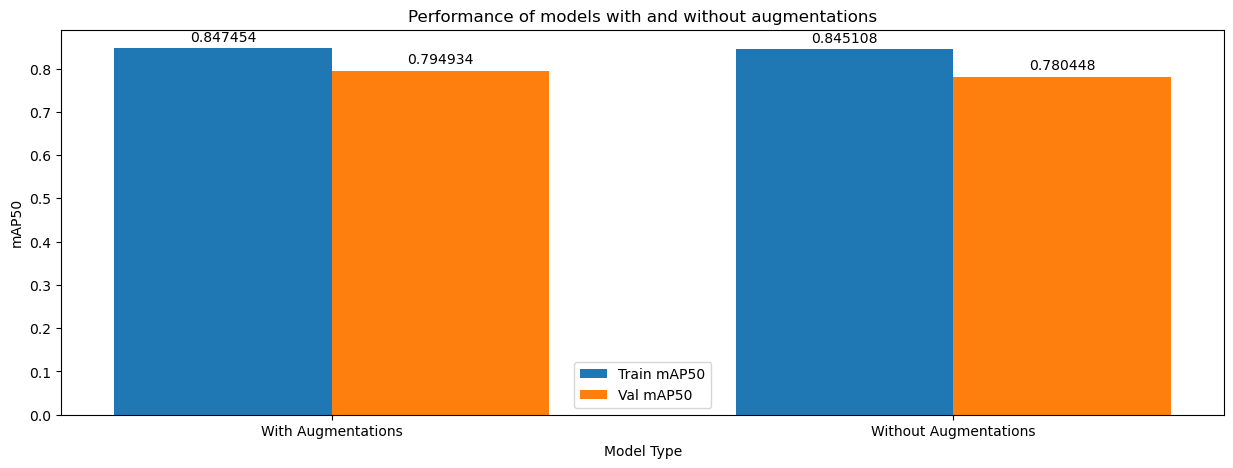

In [8]:
x  = np.arange(len(augments))
width = 0.35

model_type = ["With Augmentations", "Without Augmentations"]

plt.figure(figsize=(15, 5))

train_rects = plt.bar(x - width/2, aug_train_metrics, width, label="Train mAP50")
val_rects   = plt.bar(x + width/2, aug_val_metrics,   width, label="Val mAP50")

plt.bar_label(train_rects, padding=3)
plt.bar_label(val_rects,   padding=3)

plt.xlabel("Model Type")
plt.ylabel("mAP50")
plt.title("Performance of models with and without augmentations")
plt.xticks(x, model_type)
plt.legend()
plt.show()

#### The change in train AP50 is nearly `6%` and the change in validation AP50 is nearly `3.5%`, which is generally considered to be significant

#### This trend is observed as augmentations help the model in learning variations in the data inspite of having a rather "clean" or "uniform" dataset with no variations across the samples and hence, the model generalizes better to unseen data

<hr>

### Most important augmentation

In [9]:
no_aug_args = dict(
    hsv_h = 0,
    hsv_s = 0,
    hsv_v = 0,
    translate = 0,
    scale = 1,
    fliplr = 0,
    mosaic = 0,
    erasing = 0
)

ablation_keys = list(no_aug_args.keys())

ablation_train_metrics = []
ablation_val_metrics   = []

for key in ablation_keys:
    no_aug_dict = {
        f"{key}": no_aug_args[key]
    }

    gc.collect()
    torch.cuda.empty_cache()

    model = YOLO("yolov8n.pt")
    result = model.train(data="data/q2/1/config.yaml", epochs=20, batch=48, seed=SEED, device=yolo_device, workers=4, project=f"yolov8n_ablation_{key}", **no_aug_dict)

    train_metric = model.val(data="data/q2/1/config_train_metrics.yaml", batch=48, device=yolo_device, workers=4, project=f"yolov8n_ablation_{key}")
    val_metric   = model.val(data="data/q2/1/config.yaml",               batch=48, device=yolo_device, workers=4, project=f"yolov8n_ablation_{key}")

    ablation_train_metrics.append(train_metric.box.map50)
    ablation_val_metrics.append(val_metric.box.map50)

    del train_metric
    del val_metric
    del result
    del model

    gc.collect()
    torch.cuda.empty_cache()

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_hsv_h, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_hsv_h/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_hsv_h/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_hsv_h/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.113      3.139       1.25         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.77it/s]


                   all         50         52    0.00333      0.962      0.578      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.045      2.574       1.17         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]


                   all         50         52     0.0034      0.981      0.658      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.9364      2.211      1.132         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]


                   all         50         52     0.0034      0.981       0.77      0.623

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8564      1.936      1.067         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]


                   all         50         52          1     0.0623       0.77      0.608

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8462      1.872       1.06         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         50         52      0.936      0.283      0.766      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.8358      1.798      1.081         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]


                   all         50         52      0.796      0.452      0.692      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8517      1.817      1.067          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]


                   all         50         52      0.787       0.57      0.725      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8105      1.673      1.038         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         50         52      0.648      0.673      0.729      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7474      1.599      1.016         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]


                   all         50         52      0.735      0.519      0.637      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.8307      1.589      1.043         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52      0.757        0.5      0.639      0.393
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7595      2.148      1.076          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]


                   all         50         52      0.727      0.615      0.627      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7731      1.889       1.07          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all         50         52      0.295      0.385       0.26     0.0952

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8067      1.984      1.058          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]


                   all         50         52      0.542      0.547      0.444      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7533      1.833      1.023          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


                   all         50         52      0.735      0.692      0.714      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7355      1.764      1.011          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all         50         52      0.728      0.731      0.747      0.589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7377       1.54       1.07          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52      0.678      0.808      0.789      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6577      1.516     0.9566          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]


                   all         50         52      0.764      0.748      0.821      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.7207      1.543     0.9653          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         50         52       0.84      0.706      0.828      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6135      1.399     0.9158          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]


                   all         50         52      0.804      0.788      0.812      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6482      1.394      1.002          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


                   all         50         52      0.837       0.75      0.814      0.627

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_hsv_h/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_hsv_h/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_hsv_h/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]


                   all         50         52      0.678      0.852      0.821      0.655
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to yolov8n_ablation_hsv_h/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▅▆▇▇▇▆▇▇▆▆▆▁▃▇▇█████
wandb:     metrics/mAP50-95(B) ▅▆█▇▇▆▆▆▅▅▄▁▃▆▇█████
wandb:    metrics/precision(B) ▁▁▁██▇▇▆▆▆▆▃▅▆▆▆▆▇▇▆
wandb:       metrics/recall(B) ███▁▃▄▅▆▄▄▅▃▅▆▆▇▆▆▇▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▄▄▄▄▄▃▄▃▃▄▃▃▃▂▃▁▁
wandb:          train/cls_loss █▆▄▃▃▃▃▂▂▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▄▄▄▄▃▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▂▁▃▃▂▃▅▆▆█▆▃▃▃▂▂▂▂
wandb:            val/cls_loss ▇▇▇▇▆▆▆▅▆▆▆█▅▃▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▁▁▂▂▂▂▄▄▅█▄▂▂▂▁▁▂▁
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]


                   all        400        418      0.765      0.725      0.805      0.676
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_ablation_hsv_h/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


                   all         50         52      0.722      0.851      0.822      0.669
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8n_ablation_hsv_h/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_hsv_s, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, fr

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_hsv_s/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_hsv_s/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_hsv_s/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G       1.11      3.134      1.256         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]


                   all         50         52    0.00333      0.962      0.538      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.018      2.641      1.161         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]


                   all         50         52     0.0034      0.981       0.67      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.9448      2.211      1.116         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.07it/s]


                   all         50         52     0.0034      0.981       0.78      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G      0.878      1.934      1.075         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]


                   all         50         52      0.863      0.483      0.744      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G     0.8202      1.879      1.035         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]


                   all         50         52          1      0.343      0.765      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G     0.8047      1.762      1.054         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]


                   all         50         52      0.888      0.305      0.651      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G      0.815      1.708       1.06          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


                   all         50         52      0.777      0.469      0.665      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.32G     0.8064       1.67      1.054         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]


                   all         50         52      0.542      0.638      0.677      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.7456      1.579       1.01         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


                   all         50         52      0.756      0.776      0.792      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G     0.8086      1.586      1.022         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


                   all         50         52      0.837      0.691      0.788      0.554
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7372      2.057      1.073          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


                   all         50         52      0.729      0.671      0.681      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7831      1.945      1.063          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


                   all         50         52      0.773      0.731      0.724       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G      0.768       1.89      1.023          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52      0.722      0.692      0.701      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7587      1.832       1.02          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


                   all         50         52      0.762      0.596      0.659      0.451

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7574      1.772      1.003          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]


                   all         50         52       0.76      0.577       0.69      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.6865      1.555      1.022          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]


                   all         50         52      0.752       0.75      0.747      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G      0.633      1.502     0.9642          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]


                   all         50         52      0.791      0.731      0.733        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.7283      1.541     0.9951          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.757      0.788      0.781      0.622

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6215      1.387     0.9223          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         50         52      0.744      0.781      0.751      0.606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6354        1.4     0.9945          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.67it/s]


                   all         50         52      0.722      0.801      0.759      0.624

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_hsv_s/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_hsv_s/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_hsv_s/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]


                   all         50         52      0.757      0.788       0.78      0.622
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_ablation_hsv_s/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▅█▇▇▄▅▅██▅▆▅▄▅▇▆█▇█
wandb:     metrics/mAP50-95(B) ▁▆▇▇█▄▄▄▇▆▅▆▄▃▅▆▇███
wandb:    metrics/precision(B) ▁▁▁▇█▇▆▅▆▇▆▆▆▆▆▆▇▆▆▆
wandb:       metrics/recall(B) ███▃▁▁▃▄▆▅▅▅▅▄▄▆▅▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▃▃▃▂▁▃▁▁
wandb:          train/cls_loss █▆▄▃▃▃▂▂▂▂▄▃▃▃▃▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▃▄▄▄▃▃▄▄▃▃▃▃▂▃▁▃
wandb:            val/box_loss ▁▁▃▂▃▄▆▅▅▆▇▆█▇█▆▄▄▃▄
wandb:            val/cls_loss █▇▇▇▇▇▇▆▄▄▅▃▄▄▂▂▂▂▁▁
wandb:            val/dfl_loss ▁▁▃▃▃▃▆▆▆▇▇▅███▆▄▄▃▄
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]


                   all        400        418      0.748      0.768       0.82      0.688
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_ablation_hsv_s/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


                   all         50         52      0.746      0.712      0.761      0.627
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to yolov8n_ablation_hsv_s/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_hsv_v, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, fr

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_hsv_v/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_hsv_v/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_hsv_v/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G      1.118      3.138      1.256         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.13it/s]


                   all         50         52    0.00333      0.962      0.524      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.012      2.618      1.161         12        640: 100%|██████████| 9/9 [00:01<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]


                   all         50         52     0.0034      0.981      0.679      0.527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.9278      2.221      1.135         10        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         50         52     0.0034      0.981      0.774      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G     0.8608      1.957      1.069         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]


                   all         50         52          1      0.115      0.687      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G     0.8329      1.857       1.06         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         50         52      0.848      0.215      0.703      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G     0.8216      1.765       1.07         15        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         50         52      0.808      0.568      0.719      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8261      1.756      1.046          8        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52       0.77      0.707      0.706      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.32G     0.7781      1.626      1.026         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]


                   all         50         52      0.726      0.558      0.632      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.7365      1.545      1.015         12        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         50         52       0.73      0.654      0.706      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G      0.782      1.577      1.011         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


                   all         50         52      0.698      0.673      0.728      0.473
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7343      2.098      1.045          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.26it/s]


                   all         50         52      0.737      0.594      0.687      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7302      1.872      1.031          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]


                   all         50         52      0.811      0.579      0.714      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.7852      1.903      1.057          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


                   all         50         52      0.652      0.654      0.699      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7707      1.845      1.056          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


                   all         50         52      0.757       0.72      0.762      0.577

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7767      1.678       1.02          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.621      0.821      0.755      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.6905      1.583      1.031          5        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]


                   all         50         52      0.767      0.695      0.787      0.621

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6899      1.501     0.9632          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.796      0.769      0.783      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G      0.682      1.538     0.9688          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         50         52      0.767       0.75      0.793      0.648

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.5927      1.395      0.898          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


                   all         50         52      0.745      0.785      0.794      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6363      1.388     0.9895          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]


                   all         50         52      0.675      0.885      0.796      0.659

20 epochs completed in 0.019 hours.
Optimizer stripped from yolov8n_ablation_hsv_v/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_hsv_v/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_hsv_v/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.70it/s]


                   all         50         52      0.675      0.885      0.797       0.66
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to yolov8n_ablation_hsv_v/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▅▇▅▆▆▆▄▆▆▅▆▆▇▇█████
wandb:     metrics/mAP50-95(B) ▁▅▅▅▅▅▅▃▅▃▄▅▅▆▆▇████
wandb:    metrics/precision(B) ▁▁▁█▇▇▆▆▆▆▆▇▆▆▅▆▇▆▆▆
wandb:       metrics/recall(B) ███▁▂▅▆▅▅▆▅▅▅▆▇▆▆▆▆▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▅▅▄▄▄▃▃▄▃▃▄▃▃▂▂▂▁▂
wandb:          train/cls_loss █▆▄▃▃▃▂▂▂▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▃▄▄▄▄▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▄▄▅▆▄▆▆██▇▇▇▆▆▄▄▃▃
wandb:            val/cls_loss █▇▇▇▇▇▆▆▅▅▆▄▄▂▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▄▃▄▅▄▆▆█▇▆▅▆▆▅▄▃▃▃
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.15it/s]


                   all        400        418      0.833      0.801      0.883      0.773
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8n_ablation_hsv_v/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all         50         52      0.705      0.846      0.795       0.66
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8n_ablation_hsv_v/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_translate, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_translate/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_translate/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_translate/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.064      3.127      1.213         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]


                   all         50         52    0.00333      0.962      0.531      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.034      2.614        1.2         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]


                   all         50         52     0.0034      0.981      0.687      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9127      2.268      1.116         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]


                   all         50         52     0.0034      0.981      0.755      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8906      1.965      1.103         13        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         50         52        0.6      0.673       0.65      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8719      1.864       1.07         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]


                   all         50         52          1      0.346      0.784       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.8351        1.8      1.069         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52      0.761      0.519      0.749      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.33G     0.8419       1.75      1.054          9        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]


                   all         50         52      0.744      0.673      0.733      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8463      1.669      1.064         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]


                   all         50         52      0.732      0.683      0.714      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7368      1.549      0.998         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]


                   all         50         52      0.738      0.651      0.673      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G       0.83      1.574      1.047         13        640: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


                   all         50         52      0.702      0.654      0.679      0.457
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.33G     0.7836      2.086      1.093          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.06it/s]


                   all         50         52      0.691      0.603      0.646      0.405

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.33G     0.8049      1.892      1.087          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


                   all         50         52      0.596      0.577      0.543      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.33G     0.8223      1.939      1.055          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]


                   all         50         52      0.576      0.549      0.557      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.33G     0.7388      1.799     0.9974          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


                   all         50         52      0.729      0.654      0.707      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.33G     0.7365      1.747      1.012          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52      0.738      0.769      0.774      0.559

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.33G     0.6768      1.517      1.006          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]


                   all         50         52      0.742      0.731      0.772      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.33G     0.6352      1.514     0.9594          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.32it/s]


                   all         50         52      0.856       0.75       0.81      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.33G     0.7504      1.541     0.9958          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]


                   all         50         52      0.848      0.751      0.823       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.33G     0.6085      1.391     0.9323          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]


                   all         50         52      0.745      0.827      0.821      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.33G     0.5832      1.335     0.9317          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]


                   all         50         52      0.898       0.75       0.85      0.686

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_translate/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_translate/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_translate/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]


                   all         50         52      0.898       0.75       0.85      0.685
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to yolov8n_ablation_translate/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▄▆▄▇▆▅▅▄▄▄▁▂▅▆▆▇▇▇█
wandb:     metrics/mAP50-95(B) ▃▅▆▄▅▆▆▅▄▄▃▂▁▅▆▇▇█▇█
wandb:    metrics/precision(B) ▁▁▁▅█▆▆▆▆▆▆▅▅▆▆▆▇▇▆▇
wandb:       metrics/recall(B) ███▅▁▃▅▅▄▄▄▄▃▄▆▅▅▅▆▅
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ██▆▅▅▅▅▅▃▅▄▄▄▃▃▂▂▃▁▁
wandb:          train/cls_loss █▆▅▃▃▃▃▂▂▂▄▃▃▃▃▂▂▂▁▁
wandb:          train/dfl_loss ██��▅▄▄▄▄▃▄▅▅▄▃▃▃▂▃▁▁
wandb:            val/box_loss ▁▂▂▃▅▃▃▄▅▅▇▇█▅▅▄▄▃▃▃
wandb:            val/cls_loss █▇▇▇▇▆▇▆▅▆▇▆▅▄▃▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▃▃▂▄▅▅▇▇█▄▄▃▃▂▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]


                   all        400        418      0.814      0.794      0.873      0.763
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8n_ablation_translate/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


                   all         50         52      0.848      0.752      0.846      0.684
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_ablation_translate/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_scale, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_scale/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_scale/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_scale/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G      1.264      3.416      1.296         19        640: 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.46it/s]


                   all         50         52    0.00333      0.962      0.532      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.133      2.781      1.171         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]


                   all         50         52     0.0034      0.981      0.626      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G      1.041      2.408      1.112         13        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]


                   all         50         52     0.0034      0.981      0.711      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G      1.152      2.258      1.163         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]


                   all         50         52    0.00333      0.962      0.685      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G      1.049      2.078      1.109         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]


                   all         50         52      0.366      0.865      0.721      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G      1.026      1.977      1.125         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]


                   all         50         52      0.886      0.269      0.695      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G      1.027      2.021      1.103          9        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]


                   all         50         52      0.953      0.389      0.728      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G       1.03      1.855      1.144         18        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


                   all         50         52      0.762      0.596      0.706      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.9312      1.859      1.097         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


                   all         50         52      0.763      0.577      0.623      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G      1.015      1.856      1.114         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]


                   all         50         52      0.748      0.596      0.661      0.483
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.8996      2.397      1.176          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]


                   all         50         52      0.482      0.404       0.35      0.181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.8903      2.208      1.174          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]


                   all         50         52       0.56      0.539      0.519      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8809       2.23      1.134          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]


                   all         50         52      0.453      0.615      0.524      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G      1.002      2.191      1.236          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52      0.754      0.708      0.709       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.8559       2.05      1.077          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]


                   all         50         52      0.706      0.692      0.705      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.9091      1.917      1.181          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]


                   all         50         52      0.717      0.683      0.695       0.51

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.7963      1.896      1.085          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.734      0.731      0.774      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.8525      1.961      1.092          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]


                   all         50         52      0.836      0.673      0.771      0.638

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.7925      1.805       1.02          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


                   all         50         52      0.767      0.712      0.768       0.63

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.7715      1.959      1.094          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]


                   all         50         52      0.788      0.712      0.797      0.654

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_scale/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_scale/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_scale/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]


                   all         50         52      0.803      0.707      0.798      0.655
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_ablation_scale/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▄▅▇▆▇▆▇▇▅▆▁▄▄▇▇▆████
wandb:     metrics/mAP50-95(B) ▄▅▆▆▆▅▅▆▅▅▁▃▂▆▆▆▇███
wandb:    metrics/precision(B) ▁▁▁▁▄██▇▇▆▅▅▄▇▆▆▆▇▇▇
wandb:       metrics/recall(B) ████▇▁▂▄▄▄▂▄▄▅▅▅▆▅▅▅
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▅▆▅▅▅▅▃▄▃▃▃▄▂▃▁▂▁▁
wandb:          train/cls_loss █▅▄▃▂▂▂▁▁▁▄▃▃▃▂▁▁▂▁▂
wandb:          train/dfl_loss █▅��▅▃▄▃▄▃▃▅▅▄▆▂▅▃▃▁▃
wandb:            val/box_loss ▁▁▂▂▃▄▅▄▅▄██▇▅▃▄▄▃▃▃
wandb:            val/cls_loss █▇███▇▇▆▆▅█▆▅▃▂▂▂▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▂▃▄▄▄▃██▆▄▃▄▃▃▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.14it/s]


                   all        400        418       0.68      0.686      0.737      0.614
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_ablation_scale/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


                   all         50         52      0.803      0.712      0.793       0.63
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolov8n_ablation_scale/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_fliplr, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, f

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_fliplr/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_fliplr/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_fliplr/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.108      3.122      1.242         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.75it/s]


                   all         50         52    0.00333      0.962      0.584      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.016       2.57       1.16         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]


                   all         50         52    0.00757      0.942      0.682      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.9218      2.178      1.115         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]


                   all         50         52     0.0034      0.981      0.763      0.558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8299      1.917      1.051         14        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]


                   all         50         52      0.844      0.173      0.746      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G      0.803      1.876      1.024         11        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


                   all         50         52      0.922      0.288      0.735      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.7692      1.755      1.023         15        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]


                   all         50         52      0.767      0.507      0.716      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.7538      1.703      1.041          8        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.46it/s]


                   all         50         52       0.79      0.435      0.715      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G      0.756      1.606      1.015         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


                   all         50         52      0.667      0.596      0.548      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7146       1.47      1.001         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.21it/s]


                   all         50         52      0.723      0.553      0.634      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.7571      1.476      1.017         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]


                   all         50         52      0.816      0.599      0.672      0.525
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7354      1.981      1.056          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52      0.691      0.473      0.532      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7203      1.868      1.018          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]


                   all         50         52      0.683      0.481      0.541      0.381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.6997      1.781     0.9755          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]


                   all         50         52      0.597      0.519       0.51      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G      0.763       1.74      1.043          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]


                   all         50         52      0.788       0.57      0.639      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.6448      1.514     0.9622          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


                   all         50         52      0.684       0.75      0.753      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G      0.589      1.362     0.9753          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]


                   all         50         52       0.84      0.692      0.823      0.632

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6175      1.428     0.9376          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]


                   all         50         52      0.741      0.771       0.74      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.6387      1.413     0.9178          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         50         52      0.742      0.769      0.741      0.615

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.5434      1.236     0.8902          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52      0.771       0.75      0.754      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.5741      1.202      0.953          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


                   all         50         52      0.828      0.742      0.772      0.634

20 epochs completed in 0.019 hours.
Optimizer stripped from yolov8n_ablation_fliplr/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_fliplr/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_fliplr/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]


                   all         50         52      0.839      0.692      0.824      0.635
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_ablation_fliplr/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▃▅▇▆▆▆▆▂▄▅▁▂▁▄▆█▆▆▆█
wandb:     metrics/mAP50-95(B) ▃▄▆▇▆▆▆▁▄▅▂▁▂▃▇█▆▇██
wandb:    metrics/precision(B) ▁▁▁▇█▇▇▆▆▇▆▆▆▇▆▇▇▇▇▇
wandb:       metrics/recall(B) ███▁▂▄▃▅▄▅▄▄▄▄▆▆▆▆▆▅
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▃▄▂▂▂▂▁▁
wandb:          train/cls_loss █▆▅▄▃▃▃▂▂▂▄▃▃▃▂▂▂▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▃▃▄▄▄▃▄▂▃▂▂▁▂
wandb:            val/box_loss ▁▃▃▂▄▄▄▇▆▅█▇▅▆▅▅▄▃▃▃
wandb:            val/cls_loss █▇▇▇▇▆▇▇▆▆▇▆▅▄▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▂▂▂▄▃▄▇▆▅█▇▅▅▄▃▃▁▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


                   all        400        418      0.847      0.792      0.874      0.739
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to yolov8n_ablation_fliplr/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all         50         52       0.86       0.71      0.837      0.644
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to yolov8n_ablation_fliplr/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_mosaic, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, 

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_mosaic/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_mosaic/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_mosaic/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G      1.182      3.786      1.317          6        640: 100%|██████████| 9/9 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]


                   all         50         52    0.00333      0.962      0.536      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.054      3.389      1.227          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]


                   all         50         52     0.0034      0.981      0.657      0.533

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.32G     0.9728      3.038      1.106          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all         50         52     0.0034      0.981      0.738      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.32G     0.9649      2.665      1.187          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]


                   all         50         52      0.769      0.596      0.751      0.584

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.32G     0.8634      2.493      1.136          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


                   all         50         52          1       0.15      0.724      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.32G     0.8315      2.388      1.114          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]


                   all         50         52      0.872      0.263       0.75      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8818      2.265      1.104          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.19it/s]


                   all         50         52          1      0.266      0.773      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.32G      0.904      2.302      1.136          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]


                   all         50         52      0.865      0.365      0.736      0.556

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.32G     0.8168      2.216      1.041          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


                   all         50         52      0.719      0.615      0.612      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.32G     0.8651      2.166      1.068          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]


                   all         50         52      0.715      0.578      0.665      0.517
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7663      1.893       1.08          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]


                   all         50         52      0.753      0.646       0.66      0.475

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7933      1.866      1.074          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]


                   all         50         52      0.718      0.731      0.666       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G      0.843      1.961      1.084          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]


                   all         50         52      0.721      0.769      0.694      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7954      1.862      1.039          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]


                   all         50         52      0.733      0.769      0.706       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G     0.7703      1.643      1.033          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]


                   all         50         52      0.732      0.839      0.769      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7019      1.549      1.052          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all         50         52      0.824      0.712      0.772      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6844      1.586     0.9648          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]


                   all         50         52      0.722      0.769      0.745       0.57

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G     0.7154      1.538     0.9748          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]


                   all         50         52      0.732      0.842      0.765      0.597

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6094      1.424     0.9212          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]


                   all         50         52      0.755      0.846      0.768      0.624

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6309       1.38     0.9796          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]


                   all         50         52      0.752      0.808      0.793      0.646

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_mosaic/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_mosaic/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_mosaic/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]


                   all         50         52      0.753      0.808      0.792      0.645
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_ablation_mosaic/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▄▇▇▆▇▇▆▃▅▄▅▅▆▇▇▇▇▇█
wandb:     metrics/mAP50-95(B) ▁▅▆▆▆▅▆▆▃▅▄▄▅▅▆▆▆▇▇█
wandb:    metrics/precision(B) ▁▁▁▆█▇█▇▆▆▆▆▆▆▆▇▆▆▆▆
wandb:       metrics/recall(B) ███▅▁▂▂▃▅▅▅▆▆▆▇▆▆▇▇▇
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▆▅▅▄▄▄▅▄▄▃▃▄▃▃▂▂▂▁▁
wandb:          train/cls_loss █▇▆▅▄▄▄▄▃▃▂▂▃▂▂▁▂▁▁▁
wandb:          train/dfl_loss █▆��▆▅▄▄▅▃▄▄▄▄▃▃▃▂▂▁▂
wandb:            val/box_loss ▁▁▃▃▃▅▅▆▆▅██▅▆▆▅▅▄▃▄
wandb:            val/cls_loss ███▇▇▇▇▇▆▆▅▃▃▃▂▃▂▂▁▁
wandb:            val/dfl_loss ▁▁▃▃▂▄▄▅▅▄█▇▆▅▅▄▄▄▄▄
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]


                   all        400        418      0.857      0.737      0.869      0.751
Speed: 0.2ms preprocess, 1.7ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to yolov8n_ablation_mosaic/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]


                   all         50         52      0.755      0.808      0.792      0.642
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to yolov8n_ablation_mosaic/train3
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/q2/1/config.yaml, epochs=20, time=None, patience=100, batch=48, imgsz=640, save=True, save_period=-1, cache=False, device=[0, 1, 2], workers=4, project=yolov8n_ablation_erasing, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False,

COMET WARNING: Can not parse empty Comet API key


WARNING ⚠️ Comet installed but not initialized correctly, not logging this run. Comet.ml requires an API key. Please provide as the first argument to Experiment(api_key) or as an environment variable named COMET_API_KEY 
TensorBoard: Start with 'tensorboard --logdir yolov8n_ablation_erasing/train', view at http://localhost:6006/


wandb: Tracking run with wandb version 0.16.6
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Overriding model.yaml nc=80 with nc=1
Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to yolov8n_ablation_erasing/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.000375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 12 dataloader workers
Logging results to yolov8n_ablation_erasing/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      1.113      3.138      1.251         17        640: 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]


                   all         50         52    0.00333      0.962      0.583      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.33G      1.024      2.628      1.165         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]


                   all         50         52     0.0034      0.981      0.643      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.33G     0.9625      2.231      1.144         10        640: 100%|██████████| 9/9 [00:01<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]


                   all         50         52      0.566      0.827      0.746      0.534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.33G     0.8838      1.986      1.082         14        640: 100%|██████████| 9/9 [00:01<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.42it/s]


                   all         50         52          1      0.183      0.757      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.33G     0.8408      1.901      1.044         11        640: 100%|██████████| 9/9 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]


                   all         50         52          1       0.17      0.725      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.33G     0.7952      1.826       1.05         15        640: 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]


                   all         50         52      0.798      0.455      0.663      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.32G     0.8248      1.747      1.067          8        640: 100%|██████████| 9/9 [00:01<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.08it/s]


                   all         50         52      0.904      0.423      0.698      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.33G     0.8207      1.619      1.039         16        640: 100%|██████████| 9/9 [00:01<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]


                   all         50         52      0.705      0.645      0.704       0.49

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.33G     0.7302      1.519      1.019         12        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]


                   all         50         52      0.703      0.635      0.682      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.33G     0.8113      1.625      1.035         12        640: 100%|██████████| 9/9 [00:01<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.92it/s]


                   all         50         52      0.743      0.712      0.689      0.464
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.32G     0.7687      2.098      1.097          5        640: 100%|██████████| 9/9 [00:02<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]


                   all         50         52      0.794      0.673        0.7      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.32G     0.7491      1.901      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]


                   all         50         52      0.716      0.731      0.698      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.32G     0.8098      2.007       1.06          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.57it/s]


                   all         50         52      0.719      0.737       0.75       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.32G     0.7681      1.804      1.044          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.79it/s]


                   all         50         52       0.75      0.751      0.754      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.32G      0.744      1.753      1.006          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]


                   all         50         52      0.784      0.712      0.778      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.32G     0.7266      1.544      1.078          5        640: 100%|██████████| 9/9 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]


                   all         50         52      0.803      0.707      0.759      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.32G     0.6374      1.486     0.9503          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]


                   all         50         52      0.814      0.692      0.792      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.32G      0.722      1.569     0.9831          6        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]


                   all         50         52       0.86      0.712      0.824       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.32G     0.6129      1.415     0.9151          6        640: 100%|██████████| 9/9 [00:01<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]


                   all         50         52      0.883      0.712       0.81      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.32G     0.6562      1.403      1.012          7        640: 100%|██████████| 9/9 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]


                   all         50         52      0.809       0.75      0.806      0.646

20 epochs completed in 0.018 hours.
Optimizer stripped from yolov8n_ablation_erasing/train/weights/last.pt, 6.2MB
Optimizer stripped from yolov8n_ablation_erasing/train/weights/best.pt, 6.2MB

Validating yolov8n_ablation_erasing/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]


                   all         50         52      0.884      0.712      0.808      0.672
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to yolov8n_ablation_erasing/train


wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg1 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:                  lr/pg2 ▁▃▄▅▆▆▇████▇▇▆▅▄▃▃▂▁
wandb:        metrics/mAP50(B) ▁▃▆▆▅▃▄▅▄▄▄▄▆▆▇▆▇███
wandb:     metrics/mAP50-95(B) ▁▃▄▆▄▃▄▃▄▂▃▂▅▆▆▆▆▇██
wandb:    metrics/precision(B) ▁▁▅██▇▇▆▆▆▇▆▆▆▆▇▇▇▇▇
wandb:       metrics/recall(B) ██▇▁▁▃▃▅▅▆▅▆▆▆▆▆▆▆▆▆
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss █▇▆▅▄▄▄▄▃▄▃▃▄▃▃▃▁▃▁▂
wandb:          train/cls_loss █▆▄▃▃▃▂▂▁▂▄▃▃▃▂▂▁▂▁▁
wandb:          train/dfl_loss █▆��▄▄▄▄▄▃▄▅▄▄▄▃▄▂▂▁▃
wandb:            val/box_loss ▁▁▃▂▄▅▄▅▆▇▇█▆▄▆▅▅▄▃▃
wandb:            val/cls_loss █▇▇▇▇▇▇▆▅▅▅▄▃▂▂▂▁▁▁▁
wandb:            val/dfl_loss ▁▁▂▂▃▄▃▄▆▆▆█▅▃▅▄▄▃▂▂
wandb: 
wandb: Run summary:
wandb:                  lr/pg0 4e-05
wandb:                  lr/pg1 4e-05
wandb: 

Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]


                   all        400        418      0.844      0.756      0.847      0.734
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to yolov8n_ablation_erasing/train2
Ultralytics YOLOv8.2.69 🚀 Python-3.10.13 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:1 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)
                                                            CUDA:2 (NVIDIA GeForce GTX 1080 Ti, 11172MiB)


val: Scanning /home2/punnavajhala.prakash/Object_Detection/data/q2/2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]


                   all         50         52      0.725      0.808      0.795      0.666
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to yolov8n_ablation_erasing/train3


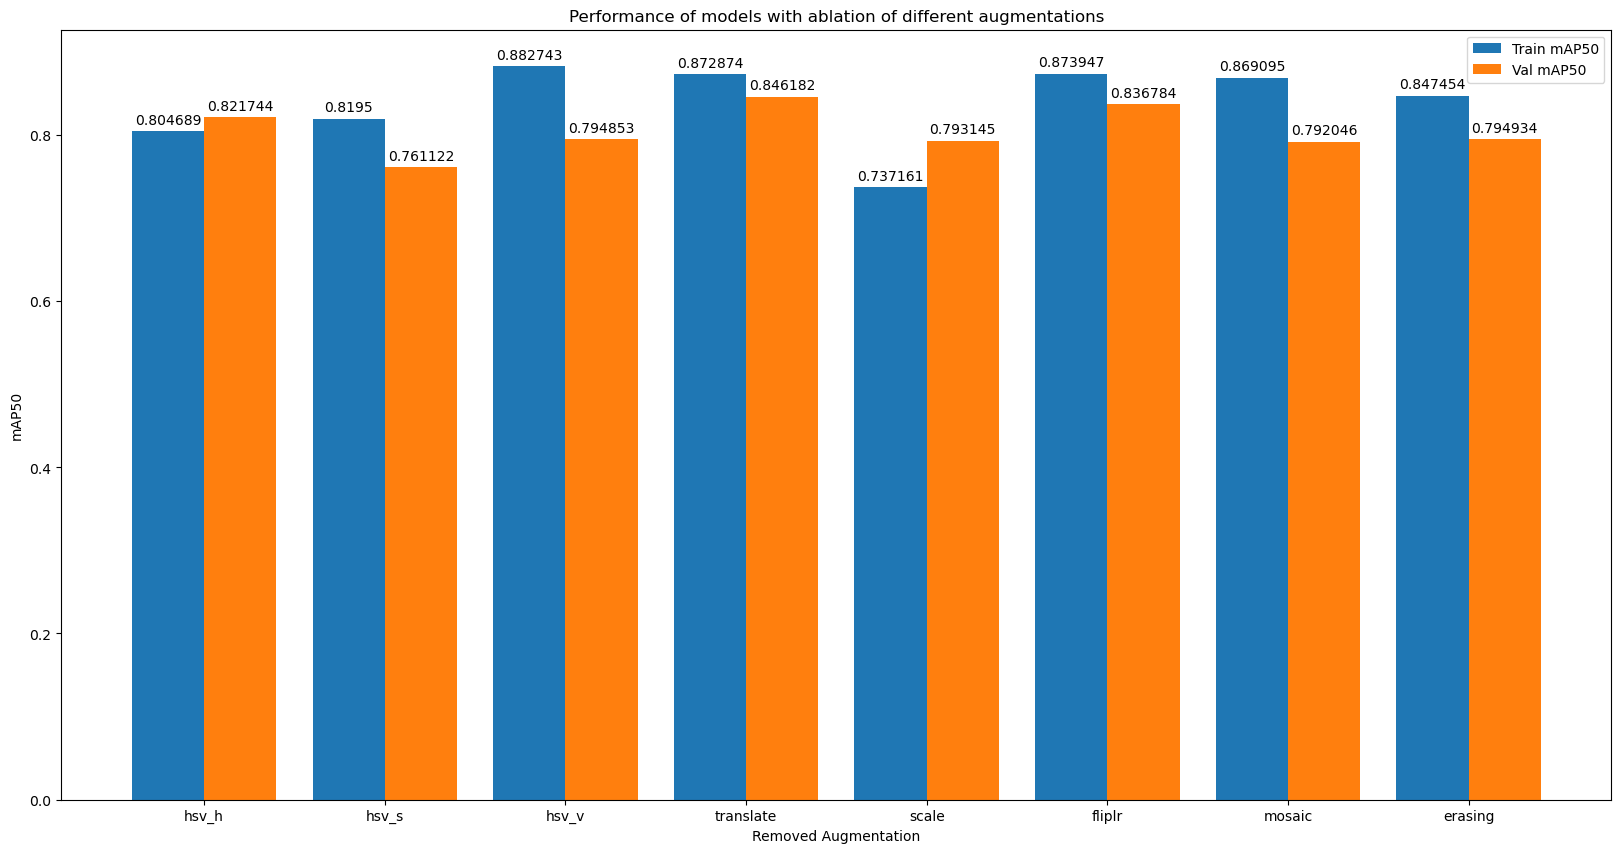

In [10]:
x     = np.arange(len(ablation_keys))
width = 0.4

plt.figure(figsize=(20, 10))

train_rects = plt.bar(x - width/2, ablation_train_metrics, width, label="Train mAP50")
val_rects   = plt.bar(x + width/2, ablation_val_metrics,   width, label="Val mAP50")

plt.bar_label(train_rects, padding=3)
plt.bar_label(val_rects,   padding=3)

plt.xlabel("Removed Augmentation")
plt.ylabel("mAP50")
plt.title("Performance of models with ablation of different augmentations")
plt.xticks(x, ablation_keys)
plt.legend()
plt.show()

#### We determine the most important augmentation using the ablation study procedure
  - This is typically done by keeping all components the same way, and changing only a single parameter

  - In our case, we remove only a single augmentation keeping all other augmentations at their default value

  - This way, we can understand the importance of each augmentation in the overall performance of the model

#### On observing the above plots, we can conclude that the `scale` augmentation is the most important augmentation as it has the highest impact on the model's performance
  - The train mAP50 drops by nearly 10% and the validation mAP50 drops by nearly 8% when the `scale` augmentation is removed

  - This can be explained by the fact that the model has to learn scale invariance to detect the ducks as the ducks in all the images are not at the same distance from the camera and hence will not be of the same relative size in the image

  - So, the model has to learn to detect the ducks at different scales, and it is evident from the above experiment that the `scale` augmentation has the highest impact on the model's performance

#### An alternative to find the most important augmentation can also be done by adding only a single augmentation to the model at a time and removing all other augmentations

#### I have used this method as this is the typical procedure used in literature to determine the importance of a component in a model

<hr>